# <span style="font-family:cursive;text-align:center">⬇️ Import Libraries</span>

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns


# from sklearn.base import BaseEstimator, TransformerMixin
# 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from category_encoders import TargetEncoder

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, RANSACRegressor

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import optuna


import tqdm
import joblib
import pickle
# serializd your object and svaes its binary form 

import shap


pd.set_option('display.max_columns', 70)
plt.rcParams['axes.spines.top']=False
plt.rcParams['axes.spines.right']=False

style.use('ggplot')
sns.set_palette('Set2')
# blue, orange, green

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# <span style="font-family:cursive;text-align:center">⬇️ Import Data</span>

In [2]:
df_train=pd.read_csv('data\\train_dataset.csv')
df_train.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                11.0        2.4                36              50.5   
1                45.0        1.8                36              50.5   
2                97.0        1.8                36              50.5   
3                46.0        1.8                36              50.5   
4               100.0        2.4                36              50.5   

   january_max_temp  february_min_temp  february_avg_temp  february_max_temp  \
0                68                 35          50.589286                 73   
1                68                 35          50.589286                 73   
2                68                 35          50.589286                 73   
3                68                 35          50.589286                 73   
4                68                 35          50.589286                 73   

   march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0              40       53.693548              80              41   
1              40       53.693548              80              41   
2              40       53.693548              80              41   
3              40       53.693548              80              41   
4              40       53.693548              80              41   

   april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  may_max_temp  \
0            55.5              78            46     56.854839            84   
1            55.5              78            46     56.854839            84   
2            55.5              78            46     56.854839            84   
3            55.5              78            46     56.854839            84   
4            55.5              78            46     56.854839            84   

   june_min_temp  june_avg_temp  june_max_temp  july_min_temp  july_avg_temp  \
0             50           60.5             90             52      62.725806   
1             50           60.5             90             52      62.725806   
2             50           60.5             90             52      62.725806   
3             50           60.5             90             52      62.725806   
4             50           60.5             90             52      62.725806   

   july_max_temp  august_min_temp  august_avg_temp  august_max_temp  \
0             84               52         62.16129               85   
1             84               52         62.16129               85   
2             84               52         62.16129               85   
3             84               52         62.16129               85   
4             84               52         62.16129               85   

   september_min_temp  september_avg_temp  september_max_temp  \
0                  52               64.65                  90   
1                  52               64.65                  90   
2                  52               64.65                  90   
3                  52               64.65                  90   
4                  52               64.65                  90   

   october_min_temp  october_avg_temp  october_max_temp  november_min_temp  \
0                47         63.016129                83                 43   
1                47         63.016

In [3]:
df_train.shape

(75757, 64)

In [4]:
df_test=pd.read_csv('data\\x_test.csv')
df_test.head()

Year_Factor State_Factor building_class                 facility_type  \
0            7      State_1     Commercial  Grocery_store_or_food_market   
1            7      State_1     Commercial  Grocery_store_or_food_market   
2            7      State_1     Commercial  Grocery_store_or_food_market   
3            7      State_1     Commercial  Grocery_store_or_food_market   
4            7      State_1     Commercial  Grocery_store_or_food_market   

   floor_area  year_built  energy_star_rating  ELEVATION  january_min_temp  \
0     28484.0      1994.0                37.0        2.4                38   
1     21906.0      1961.0                55.0       45.7                38   
2     16138.0      1950.0                 1.0       59.1                38   
3     97422.0      1971.0                34.0       35.4                38   
4     61242.0      1942.0                35.0        1.8                38   

   january_avg_temp  january_max_temp  february_min_temp  february_avg_temp  \
0         50.596774                64                 40          54.482143   
1         50.596774                64                 40          54.482143   
2         50.596774                64                 40          54.482143   
3         50.596774                64                 40          54.482143   
4         50.596774                64                 40          54.482143   

   february_max_temp  march_min_temp  march_avg_temp  march_max_temp  \
0                 66              42       56.935484              77   
1                 66              42       56.935484              77   
2                 66              42       56.935484              77   
3                 66              42       56.935484              77   
4                 66              42       56.935484              77   

   april_min_temp  april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
0              45           58.45              78            49     60.903226   
1              45           58.45              78            49     60.903226   
2              45           58.45              78            49     60.903226   
3              45           58.45              78            49     60.903226   
4              45           58.45              78            49     60.903226   

   may_max_temp  june_min_temp  june_avg_temp  june_max_temp  july_min_temp  \
0            87             51          63.15             97             53   
1            87             51          63.15             97             53   
2            87             51          63.15             97             53   
3            87             51          63.15             97             53   
4            87             51          63.15             97             53   

   july_avg_temp  july_max_temp  august_min_temp  august_avg_temp  \
0      64.258065             85               53        65.854839   
1      64.258065             85               53        65.854839   
2      64.258065             85               53        65.854839   
3      64.258065             85               53        65.854839   
4      64.258065             85               53        65.854839   

   august_max_temp  september_min_temp  september_avg_temp  \
0               88                  54           69.766667   
1               88                  54           69.766667   
2               88                  54           69.766667   
3               88                  54           69.766667   
4               88                  54           69.766667   

   september_max_temp  october_min_temp  october_avg_temp  october_max_temp  \
0                 104                48         64.193548                91   
1                 104                48         64.193548                91   
2                 104                48         64.193548                91   
3                 104                48         64.193548                91   
4                 104   

# <span style="font-family:cursive;text-align:center">📊 Exploratory Data Analysis</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    <font size='5pt'><b>Understanding features:</b></font>

year_Factor: anonymized year in which the weather and energy usage factors were observed  

state_Factor: anonymized state in which the building is located  

building_class: building classification  

facility_type: building usage type  

floor_area: floor area (in square feet) of the building  

year_built: year in which the building was constructed  

energy_star_rating: the energy star rating of the building  

elevation: elevation of the building location  

january_min_temp: minimum temperature in January (in Fahrenheit) at the location of the building  

january_avg_temp: average temperature in January (in Fahrenheit) at the location of the building  

january_max_temp: maximum temperature in January (in Fahrenheit) at the location of the building  

[Similarly for all other months]

cooling_degree_days: cooling degree day for a given day is the number of degrees where the daily average temperature   
exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.  

heating_degree_days: heating degree day for a given day is the number of degrees where the daily average temperature   falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.  

precipitation_inches: annual precipitation in inches at the location of the building  

snowfall_inches: annual snowfall in inches at the location of the building  

snowdepth_inches: annual snow depth in inches at the location of the building  

avg_temp: average temperature over a year at the location of the building  

days_below_30F: total number of days below 30 degrees Fahrenheit at the location of the building  

days_below_20F: total number of days below 20 degrees Fahrenheit at the location of the building  

days_below_10F: total number of days below 10 degrees Fahrenheit at the location of the building  

days_below_0F: total number of days below 0 degrees Fahrenheit at the location of the building  

days_above_80F: total number of days above 80 degrees Fahrenheit at the location of the building  

days_above_90F: total number of days above 90 degrees Fahrenheit at the location of the building  

days_above_100F: total number of days above 100 degrees Fahrenheit at the location of the building  

days_above_110F: total number of days above 110 degrees Fahrenheit at the location of the building  

direction_max_wind_speed: wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).  

direction_peak_wind_speed: wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).  

max_wind_speed: maximum wind speed at the location of the building  

days_with_fog: number of days with fog at the location of the building  

building_id: building id  
<br>
<font size='5pt'><b>Target</b></font><br>
site_eui: Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills 

In [5]:
numerical_feature = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df_train[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df_train.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 61
Discrete feature Count 6
Continuous feature Count 55
Categorical feature Count 3


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [7]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [8]:
print([col for col in df_train if df_train[col].nunique()==1])
print([col for col in df_test if df_test[col].nunique()==1])

[]
['Year_Factor', 'days_above_110F']


In [9]:
def missing_value_cal(df):
    ind=df.isna().sum()[df.isna().sum()>0].sort_values(ascending=False).index
    
    val=df.isna().sum()[df.isna().sum()>0].sort_values(ascending=False).values
    
    df_na=pd.DataFrame(data=val,index=ind)
    
#     df_na=df_na.drop(['site_eui'],axis=0)
    
    df_na[1]=df_na.apply(lambda x: round(100*x/len(df),2))
    
    df_na=df_na.rename(columns={0:'Missing Values',1:"% of Total Values"})
    
    print(f"Your selected dataframe has {df.shape[1]} columns.\nThere are {df_na.shape[0]} columns having missing value.")
    return df_na

In [10]:
print("Train set columns with null values: ")
print(list(df_train.columns[df_train.isnull().any()]))
print()
print('===========================================')
print()
# Missing values for training data
missing_values_train = missing_value_cal(df_train)
missing_values_train[:20].style.background_gradient(cmap='Reds')

Train set columns with null values: 
['year_built', 'energy_star_rating', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']


Your selected dataframe has 64 columns.
There are 6 columns having missing value.


In [11]:
print("Train set columns with null values: ")
print(list(df_train.columns[df_train.isnull().any()]))
print()
print('===========================================')
print()
# Missing values for training data
missing_values_train = missing_value_cal(df_test)
missing_values_train[:20].style.background_gradient(cmap='Reds')

Train set columns with null values: 
['year_built', 'energy_star_rating', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']


Your selected dataframe has 63 columns.
There are 6 columns having missing value.


In [12]:
df_test[['Year_Factor', 'days_above_110F']]

Year_Factor  days_above_110F
0               7                0
1               7                0
2               7                0
3               7                0
4               7                0
...           ...              ...
9700            7                0
9701            7                0
9702            7                0
9703            7                0
9704            7                0

[9705 rows x 2 columns]

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
   
1) `year_built`, `energy_star_rating`, `direction_max_wind_speed`, `direction_peak_wind_speed`, `max_wind_speed`, `days_with_fog` variables have `NA` values.   
2) Data contains 75757 samples and 64 features. We have 3 categorical and rest numerical features. Target is numerical.   
3) There are no duplicates in individual dataset, however there might be duplicates in the combined version   
4) there are no constant columns in train dataset, but test dataset has 2 constant columns   

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    The dataset contains time variable, `Year_Factor`, that has values from 1 to 7. Assuming the values are consecutive years,`train` dataset contains the first 6 years and `test` set contains the 7th year.</div>

In [13]:
df_train.describe()

Year_Factor    floor_area    year_built  energy_star_rating  \
count  75757.000000  7.575700e+04  73920.000000        49048.000000   
mean       4.367755  1.659839e+05   1952.306764           61.048605   
std        1.471441  2.468758e+05     37.053619           28.663683   
min        1.000000  9.430000e+02      0.000000            0.000000   
25%        3.000000  6.237900e+04   1927.000000           40.000000   
50%        5.000000  9.136700e+04   1951.000000           67.000000   
75%        6.000000  1.660000e+05   1977.000000           85.000000   
max        6.000000  6.385382e+06   2015.000000          100.000000   

          ELEVATION  january_min_temp  january_avg_temp  january_max_temp  \
count  75757.000000      75757.000000      75757.000000      75757.000000   
mean      39.506323         11.432343         34.310468         59.054952   
std       60.656596          9.381027          6.996108          5.355458   
min       -6.400000        -19.000000         10.806452         42.000000   
25%       11.900000          6.000000         29.827586         56.000000   
50%       25.000000         11.000000         34.451613         59.000000   
75%       42.700000         13.000000         37.322581         62.000000   
max     1924.500000         49.000000         64.758065         91.000000   

       february_min_temp  february_avg_temp  february_max_temp  \
count       75757.000000       75757.000000       75757.000000   
mean           11.720567          35.526837          58.486278   
std            12.577272           8.866697           8.414611   
min           -13.000000          13.250000          38.000000   
25%             2.000000          31.625000          55.000000   
50%             9.000000          34.107143          61.000000   
75%            20.000000          40.879310          62.000000   
max            48.000000          65.107143          89.000000   

       march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
count    75757.000000    75757.000000    75757.000000    75757.000000   
mean        21.606281       44.469292       70.897831       32.037171   
std         10.004303        6.657142        7.680982        5.577279   
min         -9.000000       25.854839       53.000000       15.000000   
25%         13.000000       38.096774       62.000000       26.000000   
50%         25.000000       44.516129       71.000000       32.000000   
75%         27.000000       49.354839       78.000000       37.000000   
max         52.000000       69.758065       95.000000       52.000000   

       april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
count    75757.000000    75757.000000  75757.000000  75757.000000   
mean        53.784863       82.661932     44.706179     63.742547   
std          2.500473        4.101028      4.200319      2.792919   
min         40.280000       62.000000     23.000000     46.950000   
25%         52.333333       80.000000     42.000000     62.790323   
50%         53.333333       82.000000     45.000000     62.887097   
75%         54.766667       87.000000     49.000000     65.096774   
max         74.500000      104.000000     58.000000     82.112903   

       may_max_temp  june_min_temp  june_avg_temp  june_max_temp  \
count  75757.000000   75757.000000   75757.000000   75757.000000   
mean      88.987856      51.131763      71.066384      91.400280   
std        2.864669       3.415926       2.861681       3.604068   
min       64.000000      30.000000      54.100000      67.000000   
25%       88.000000      50.000000      70.983333      89.000000   
50%       89.000000      52.000000      72.250000      90.000000   
75%       91.000000      53.000000      72.450000      94.000000   
max      112.000000      68.000000      89.550000     119.000000   

       july_min_temp  july_avg_temp  july_max_temp  august_min_temp  \
count   75757.000000   75757.000000   75757.000000     75757.000000   
mean       60.571604      76.596879      95.

In [14]:
df_test.describe()

Year_Factor    floor_area   year_built  energy_star_rating  \
count       9705.0  9.705000e+03  9613.000000         7451.000000   
mean           7.0  1.632143e+05  1963.219598           64.712924   
std            0.0  2.624759e+05    40.819953           27.935984   
min            7.0  5.982000e+03     0.000000            1.000000   
25%            7.0  4.802000e+04  1929.000000           45.000000   
50%            7.0  8.248600e+04  1969.000000           72.000000   
75%            7.0  1.775200e+05  1994.000000           88.000000   
max            7.0  6.353396e+06  2016.000000          100.000000   

         ELEVATION  january_min_temp  january_avg_temp  january_max_temp  \
count  9705.000000       9705.000000       9705.000000       9705.000000   
mean    205.231190         13.520762         36.678081         60.008449   
std     264.822814         12.458365          6.968520          5.874699   
min       1.800000         -1.000000         27.548387         42.000000   
25%      26.500000         -1.000000         27.548387         54.000000   
50%     118.900000         15.000000         38.661290         59.000000   
75%     231.300000         21.000000         41.177419         64.000000   
max     812.000000         38.000000         50.596774         71.000000   

       february_min_temp  february_avg_temp  february_max_temp  \
count        9705.000000        9705.000000        9705.000000   
mean           21.705100          41.634886          66.940958   
std             9.774624           5.528689           6.397885   
min             9.000000          33.428571          52.000000   
25%             9.000000          36.053571          59.000000   
50%            22.000000          41.625000          69.000000   
75%            28.000000          45.685185          73.000000   
max            40.000000          54.482143          76.000000   

       march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
count     9705.000000     9705.000000     9705.000000     9705.000000   
mean        23.146419       43.568863       71.160639       34.715920   
std         11.553421        6.321471        9.369843        5.395467   
min          8.000000       35.935484       53.000000       28.000000   
25%         12.000000       37.354839       59.000000       29.000000   
50%         21.000000       45.216667       77.000000       37.000000   
75%         33.000000       46.500000       80.000000       38.000000   
max         42.000000       56.935484       80.000000       45.000000   

       april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
count     9705.000000     9705.000000   9705.000000   9705.000000   
mean        54.208665       78.395775     38.720041     59.170865   
std          4.162475        9.263683      5.956980      2.729821   
min         42.766667       61.000000     30.000000     51.000000   
25%         50.833333       67.000000     30.000000     56.596774   
50%         51.857143       81.000000     40.000000     58.112903   
75%         58.450000       85.000000     42.000000     60.903226   
max         61.983333       93.000000     49.000000     64.629032   

       may_max_temp  june_min_temp  june_avg_temp  june_max_temp  \
count   9705.000000    9705.000000    9705.000000    9705.000000   
mean      87.359093      45.991860      67.560717      93.926945   
std        4.449191       3.500417       4.890466       1.758773   
min       80.000000      40.000000      55.583333      91.000000   
25%       82.000000      45.000000      62.583333      93.000000   
50%       88.000000      45.000000      68.689655      94.000000   
75%       92.000000      51.000000      70.033333      96.000000   
max       94.000000      53.000000      75.916667      97.000000   

       july_min_temp  july_avg_temp  july_max_temp  august_min_temp  \
count    9705.000000    9705.000000    9705.000000      9705.000000   
mean       53.061721      71.433595      89.392581        52.151984   

In [15]:
df_train.describe(include=['O']).T

count unique                        top   freq
State_Factor    75757      7                    State_6  50840
building_class  75757      2                Residential  43558
facility_type   75757     60  Multifamily_Uncategorized  39455

In [16]:
df_test.describe(include=['O']).T

count unique                        top  freq
State_Factor    9705      6                   State_11  3268
building_class  9705      2                 Commercial  5607
facility_type   9705     60  Multifamily_Uncategorized  2199

###  <span style="font-family:cursive;text-align:center">combine the datasets for the visualizations</span>

In [17]:
df_train['dataset']="train"
df_test['dataset']="test"

In [18]:
df=pd.concat([df_train,df_test],axis=0,ignore_index=True)
df

Year_Factor State_Factor building_class  \
0                1      State_1     Commercial   
1                1      State_1     Commercial   
2                1      State_1     Commercial   
3                1      State_1     Commercial   
4                1      State_1     Commercial   
...            ...          ...            ...   
85457            7     State_11    Residential   
85458            7     State_11    Residential   
85459            7     State_11    Residential   
85460            7     State_11    Residential   
85461            7     State_11    Residential   

                                   facility_type  floor_area  year_built  \
0                   Grocery_store_or_food_market     61242.0      1942.0   
1      Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                           Retail_Enclosed_mall    280025.0      1951.0   
3                      Education_Other_classroom     55325.0      1980.0   
4                      Warehouse_Nonrefrigerated     66000.0      1985.0   
...                                          ...         ...         ...   
85457                        5plus_Unit_Building    305925.0      2013.0   
85458                        5plus_Unit_Building     34909.0      1910.0   
85459                        5plus_Unit_Building     42393.0      2014.0   
85460                        5plus_Unit_Building     25368.0      1992.0   
85461                        5plus_Unit_Building     45640.0      1994.0   

       energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                    11.0        2.4                36          50.50000   
1                    45.0        1.8                36          50.50000   
2                    97.0        1.8                36          50.50000   
3                    46.0        1.8                36          50.50000   
4                   100.0        2.4                36          50.50000   
...                   ...        ...               ...               ...   
85457                99.0      812.0                21          38.66129   
85458                94.0       26.5                21          38.66129   
85459                94.0      812.0                21          38.66129   
85460                79.0      812.0                21          38.66129   
85461                87.0       26.5                21          38.66129   

       january_max_temp  february_min_temp  february_avg_temp  \
0                    68                 35          50.589286   
1                    68                 35          50.589286   
2                    68                 35          50.589286   
3                    68                 35          50.589286   
4                    68                 35          50.589286   
...                 ...                ...                ...   
85457                54                 28          41.625000   
85458                54                 28          41.625000   
85459                54                 28          41.625000   
85460                54                 28          41.625000   
85461                54                 28          41.625000   

       february_max_temp  march_min_temp  march_avg_temp  march_max_temp  \
0                     73              40       53.693548              80   
1                     73              40       53.693548              80   
2                     73              40       53.693548              80   
3                     73              40       53.693548              80   
4                     73              40       53.693548              80   
...                  ...             ...             ...             ...   
85457                 59              33       46.500000              59   
85458                 59              33       46.500000              59   
85459                 59              33       46.500000              59   
85460                 59              3

In [19]:
df.shape

(85462, 65)

In [20]:
df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [21]:
# Lowering case of the column names for easy access
col_low={}
for col in df.columns:
    col_low[col]=str(col).lower()
df.rename(columns=col_low,inplace=True)

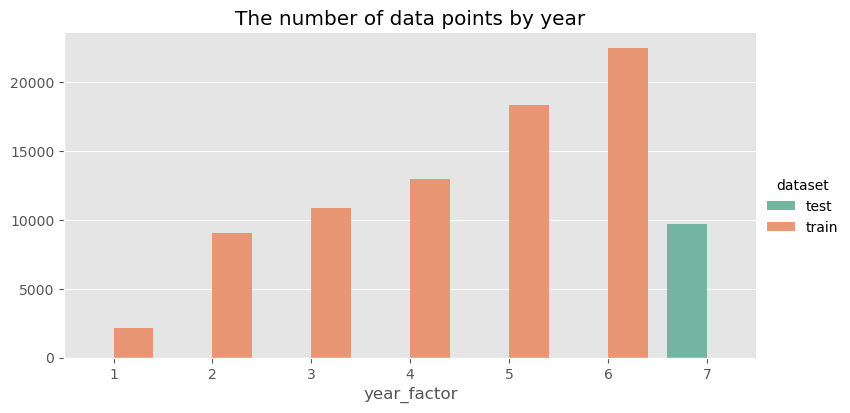

In [22]:
ax = sns.catplot(x='year_factor', 
                 y='id', 
                 data=df.groupby(['dataset','year_factor']).agg({'id':'count'}).reset_index(),
                 hue='dataset',
                 kind='bar',
                 aspect=2,
                 height=4)\
.set(title="The number of data points by year",
     ylabel=None)

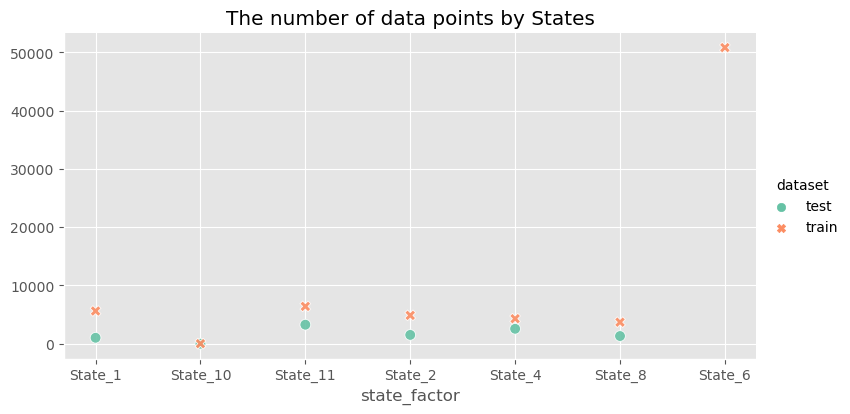

In [23]:
ax = sns.relplot(x='state_factor', 
                 y='id', 
                 data=df.groupby(['dataset','state_factor']).agg({'id':'count'}).reset_index(),
                 hue='dataset',
                 style='dataset',
                 aspect=2,
                 height=4,
                 s=60,
                 alpha=0.9
                )\
.set(title="The number of data points by States",
     ylabel=None)

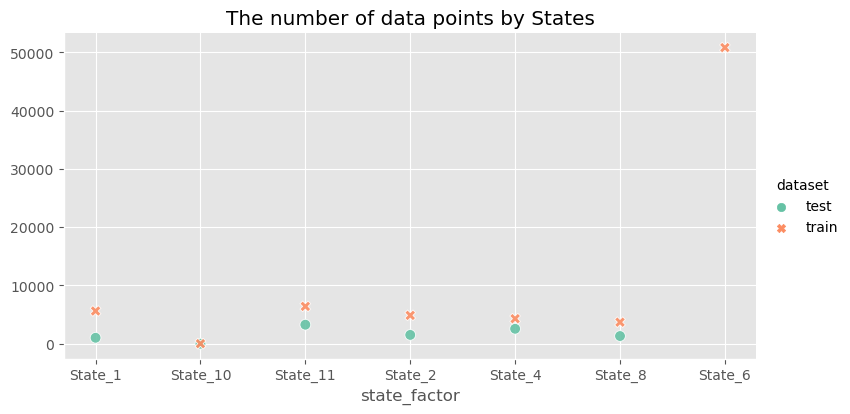

In [24]:
ax = sns.relplot(x='state_factor', 
                 y='id', 
                 data=df.groupby(['dataset','state_factor']).agg({'id':'count'}).reset_index(),
                 hue='dataset',
                 style='dataset',
                 aspect=2,
                 height=4,
                 s=60,
                 alpha=0.9
                )\
.set(title="The number of data points by States",
     ylabel=None)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">Both residential and commercial buildings are present in both datasets. `train` data contains more residential buildings compared to `test` set which is due to the number of`State_6` buildings in `train` set which seems to add to the number. Apart from `State_6`, the number of commercial buildings are higher than the residential buildings and `State_10` only contains commercial buildings. The type of building and state could be important factors in determining `EUI`.</div>

Text(0.5, 0, '')

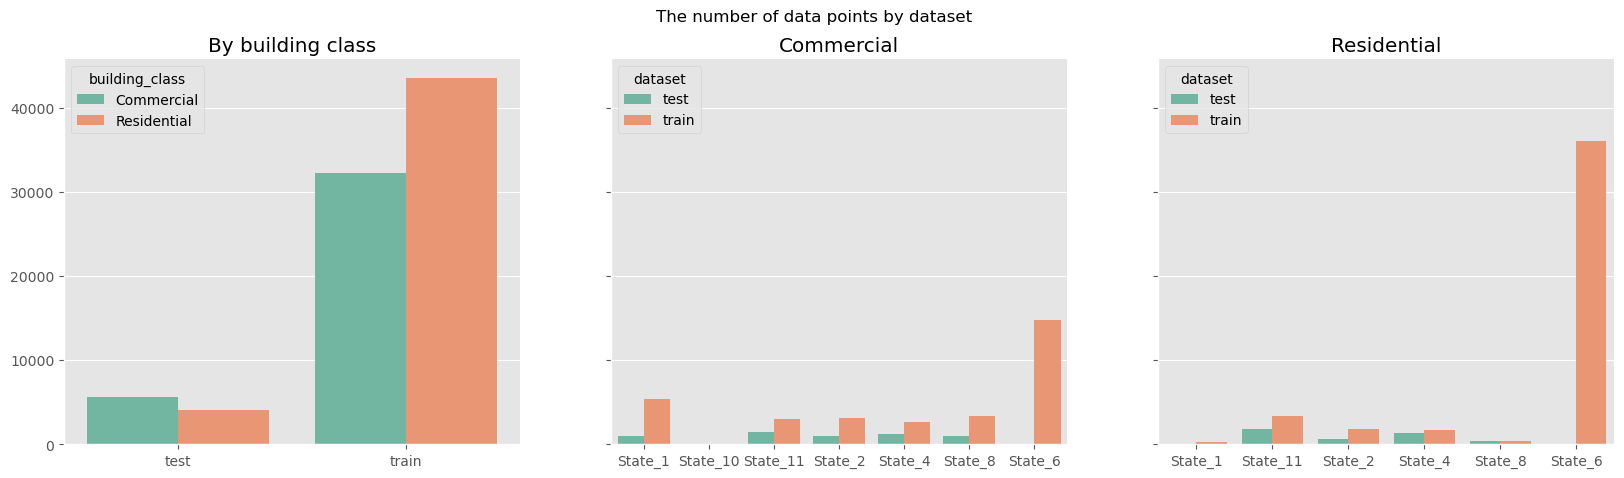

In [25]:
fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
fig.suptitle("The number of data points by dataset")

sns.barplot(x='dataset',
            y='id',
            data=df.groupby(['dataset','building_class']).agg({'id':'count'}).reset_index(),
            hue='building_class',
            ax=ax[0],
            ci=False)

for e, s in enumerate(df['building_class'].unique(),1):
    sns.barplot(x='state_factor',
                y='id',
                data=df[df['building_class']==s].groupby(['dataset','state_factor']).agg({'id':'count'}).reset_index(),
                hue='dataset',
                ax=ax[e],
                ci=False)
    ax[e].set_title(s)
    ax[e].set_ylabel("")
    ax[e].set_xlabel("")

ax[0].set_title("By building class")
ax[0].set_ylabel("")
ax[0].set_xlabel("")

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">`train` set contains data points of 7 states, however, `test` doesn't have any data point from `State_6`.</div>

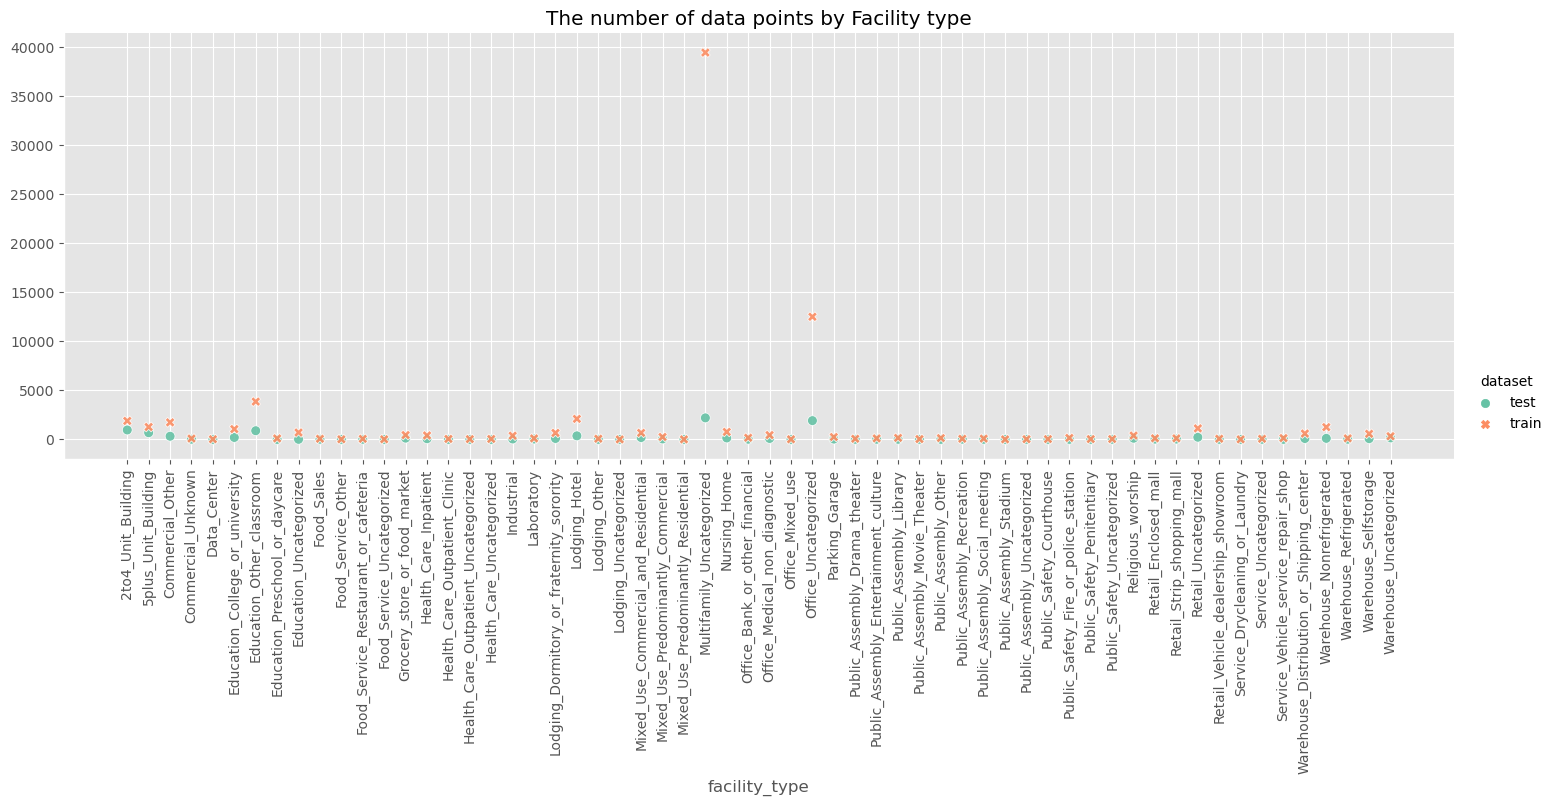

In [26]:
ax = sns.relplot(x='facility_type', 
                 y='id', 
                 data=df.groupby(['dataset','facility_type']).agg({'id':'count'}).reset_index(),
                 hue='dataset',
                 style='dataset',
                 aspect=3,
                 height=5,
                 s=50,
                 alpha=0.9
                )\
.set(title = "The number of data points by Facility type",
    ylabel=None)

ax.set_xticklabels(rotation=90) 
None

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">The oldest building was built in 1600 and the latest in 2016. The majority of the buildings were built since 1900. There were some 0 and null values. Not quite sure what 0 signifies.</div>

In [27]:
df['year_built'].value_counts().index.sort_values()

Float64Index([   0.0, 1600.0, 1649.0, 1732.0, 1756.0, 1789.0, 1799.0, 1800.0,
              1811.0, 1815.0,
              ...
              2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0,
              2015.0, 2016.0],
             dtype='float64', length=183)

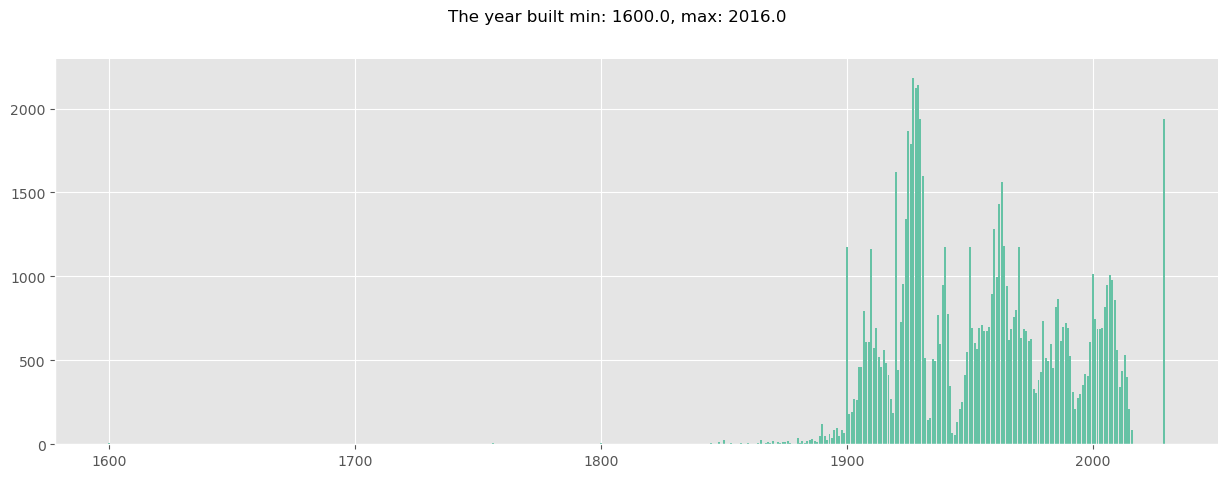

In [28]:
temp = df[['year_built']].fillna(2029).replace({0:2029}).astype('category').value_counts().reset_index().rename({0:'count'},axis=1)\
            .sort_values('year_built')
# temp['year_built'] = temp['year_built'].astype('category')
fig, ax = plt.subplots(figsize=(15,5))

ax=plt.bar(temp['year_built'],
           temp['count']
          )

fig.suptitle(f"The year built min: {min(temp['year_built'])}, max: {max(df['year_built'])}");

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">The oldest building was built in 1600 and the latest in 2016. The majority of the buildings were built since 1900. There were some 0 and null values. Not quite sure what 0 signifies.</div>

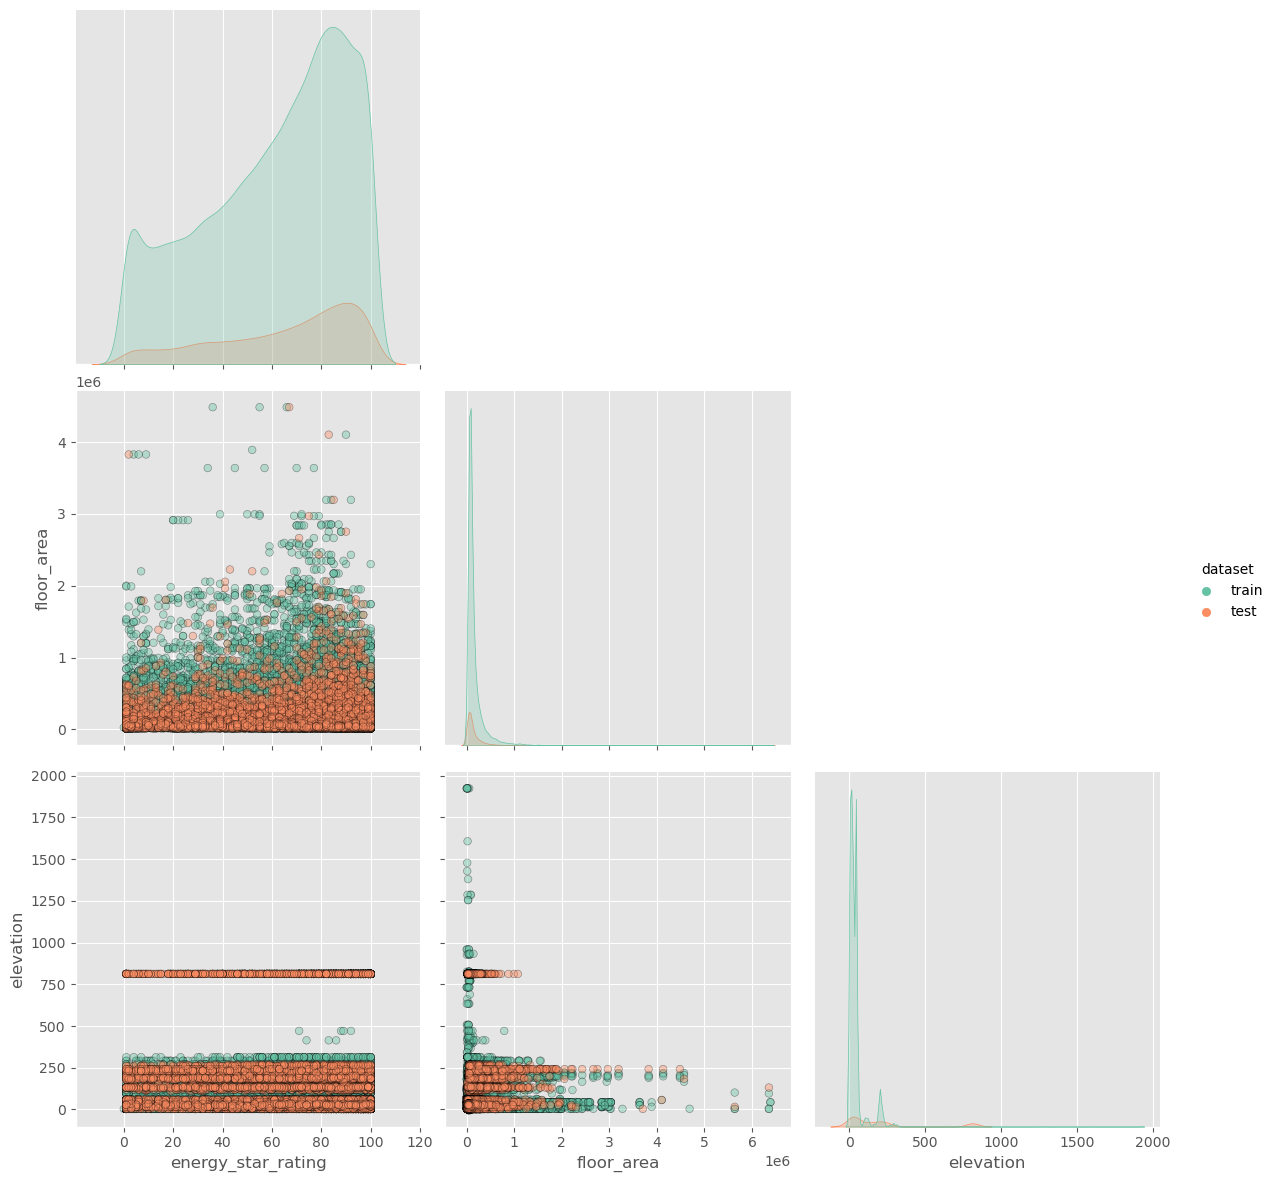

In [29]:
sns.pairplot(df,
            vars=['energy_star_rating','floor_area','elevation'], 
            hue='dataset',
            height=4,
            plot_kws = {'alpha': 0.4, 's': 30, 'edgecolor': 'k'},
            corner=True
           );

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">According to the average temperature (`avg_temp`), if we list states from warmest to coldest: State 1, State 10, State 2, and State 8. The range of temperatures of State1, State 6,  State 11 and State 4 are higher compared to the other states. </div>

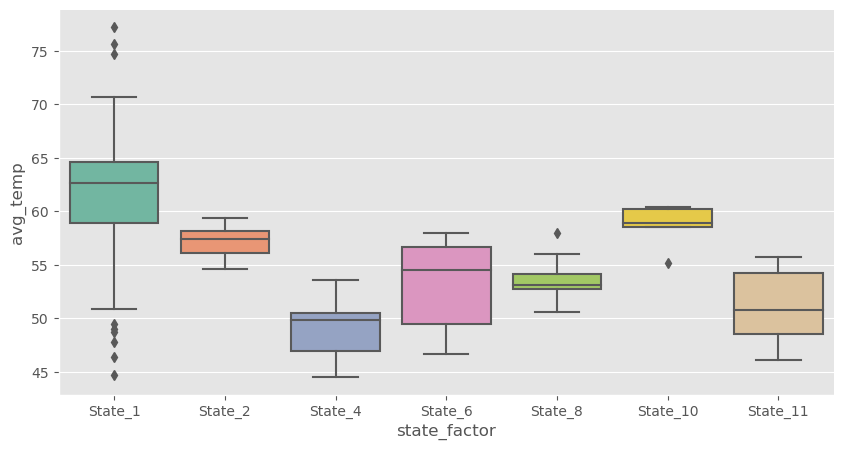

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=df[['avg_temp','state_factor']].drop_duplicates(), y='avg_temp', x='state_factor');

# any one categorical col (with low unique vals)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">Each month has unique temperature values between 31 and 59 which means the values in temperature volumes are highly repeated for the data points.</div>

In [31]:
categorycal=['year_factor', 'state_factor', 'building_class', 'facility_type']
temperature=[['january_min_temp', 'january_avg_temp', 'january_max_temp'],
        ['february_min_temp', 'february_avg_temp', 'february_max_temp'],
        ['march_min_temp', 'march_avg_temp', 'march_max_temp'], 
        ['april_min_temp','april_avg_temp', 'april_max_temp'],
        ['may_min_temp', 'may_avg_temp','may_max_temp'],
        ['june_min_temp', 'june_avg_temp', 'june_max_temp'],
        ['july_min_temp', 'july_avg_temp', 'july_max_temp'],
        ['august_min_temp','august_avg_temp', 'august_max_temp'], 
        ['september_min_temp','september_avg_temp', 'september_max_temp'], 
        ['october_min_temp','october_avg_temp', 'october_max_temp'], 
        ['november_min_temp','november_avg_temp', 'november_max_temp'], 
        ['december_min_temp','december_avg_temp', 'december_max_temp']]
dayz_under=['days_below_30f', 'days_below_20f','days_below_10f', 'days_below_0f', 
            'days_above_80f', 'days_above_90f', 'days_above_100f', 'days_above_110f']
wind=['direction_max_wind_speed','direction_peak_wind_speed', 'max_wind_speed']
other=['cooling_degree_days','energy_star_rating','heating_degree_days',
       'precipitation_inches', 'snowfall_inches','snowdepth_inches','days_with_fog']

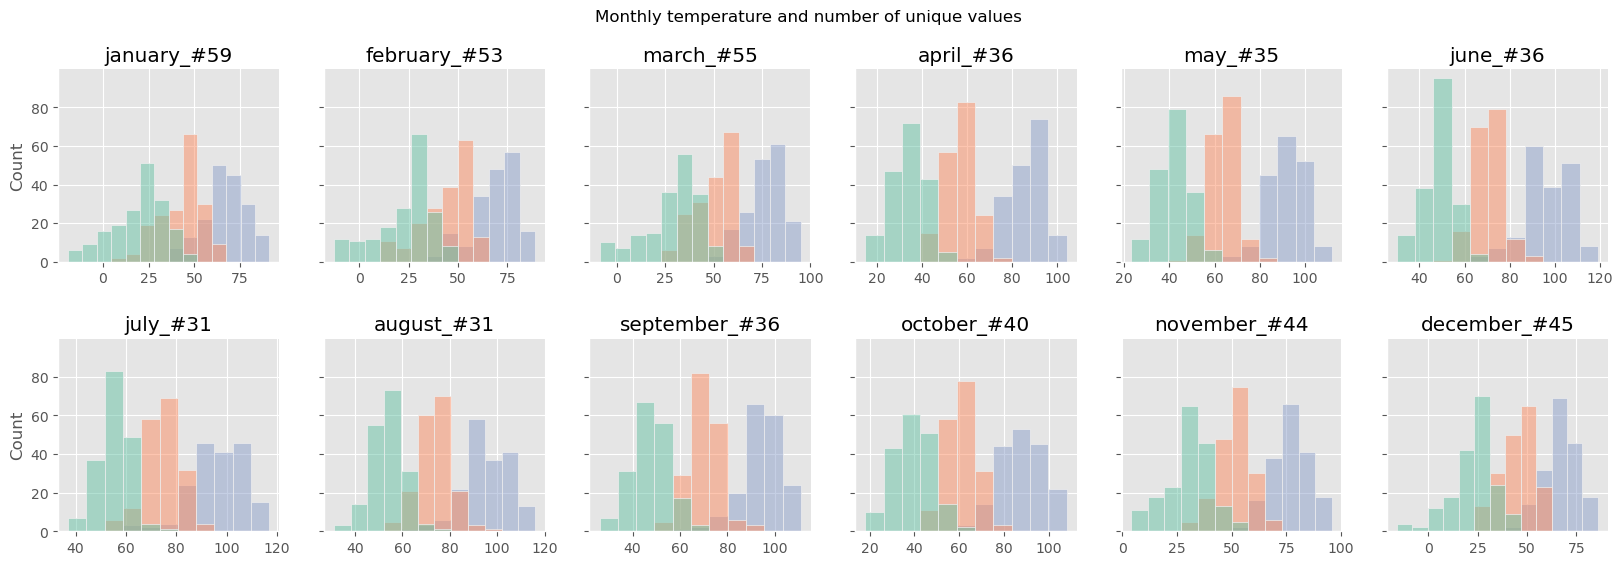

In [32]:
fig, ax = plt.subplots(2, 6, figsize=(20,6), sharey=True)
fig.suptitle("Monthly temperature and number of unique values")

for e, c in enumerate(temperature):
    if e<=5:
        sns.histplot(df[c].drop_duplicates(), ax=ax[0,e], legend=False)\
        .set(title=c[0][:c[0].find('_')]+ '_#'+str(len(df[c[0]].unique())))
    else:
        sns.histplot(df[c].drop_duplicates(), ax=ax[1,e-6], legend=False)\
        .set(title=c[0][:c[0].find('_')]+ '_#'+str(len(df[c[0]].unique())))
        
plt.subplots_adjust(hspace=0.4)

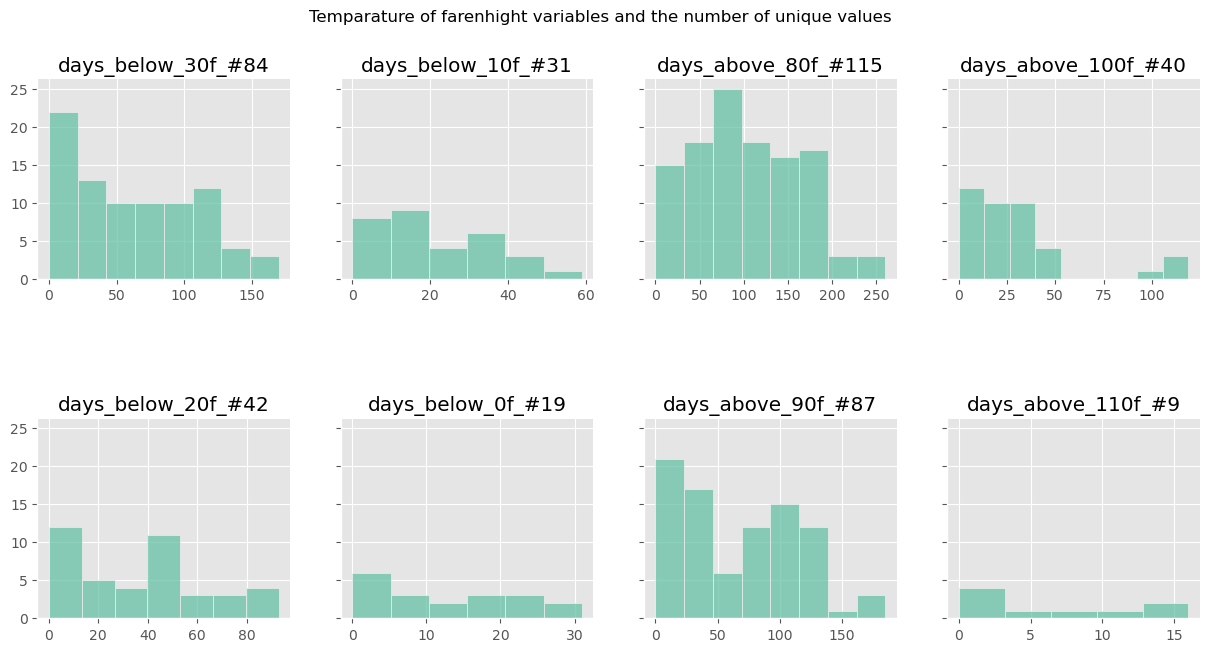

In [33]:
fig, ax = plt.subplots(2,4, figsize=(15,7), sharey=True)
fig.suptitle("Temparature of farenhight variables and the number of unique values")

for e, c in enumerate(dayz_under):
    if e<=1:
        sns.histplot(df[c].drop_duplicates(), ax=ax[e,0], legend=False)\
        .set(title=c+"_#"+str(len(df[c].unique())), ylabel=None, xlabel=None)
    elif (e>=2) and (e<=3) :
        sns.histplot(df[c].drop_duplicates(), ax=ax[e-2,1], legend=False)\
        .set(title=c+"_#"+str(len(df[c].unique())), ylabel=None, xlabel=None)
    elif (e>=4) and (e<=5):
        sns.histplot(df[c].drop_duplicates(), ax=ax[e-4,2], legend=False)\
        .set(title=c+"_#"+str(len(df[c].unique())), ylabel=None, xlabel=None)
    else:
        sns.histplot(df[c].drop_duplicates(), ax=ax[e-6,3], legend=False)\
        .set(title=c+"_#"+str(len(df[c].unique())), ylabel=None, xlabel=None)
        
plt.subplots_adjust(hspace=0.7)

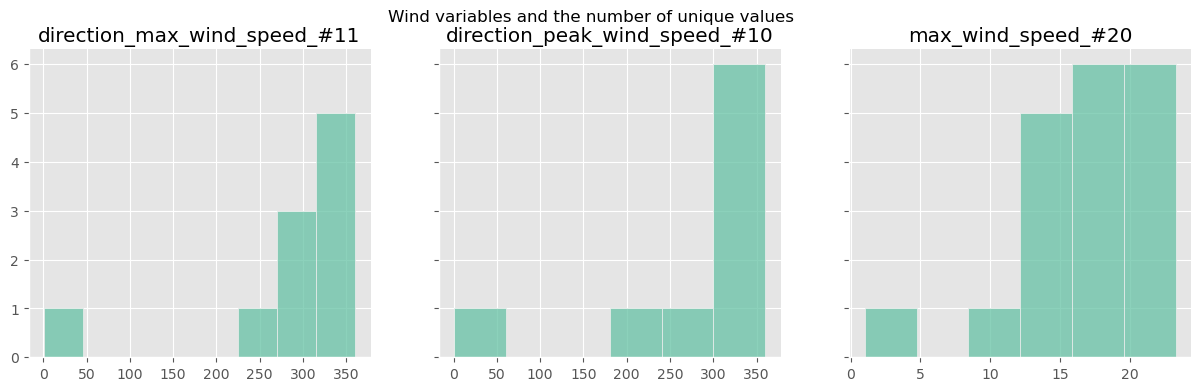

In [34]:
fig, ax = plt.subplots(1,3, figsize=(15,4), sharey=True)
fig.suptitle("Wind variables and the number of unique values")

for e, c in enumerate(wind):

    sns.histplot(df[c].drop_duplicates(), ax=ax[e], legend=False)\
    .set(title=c+"_#"+str(len(df[c].unique())), ylabel=None, xlabel=None)
         
plt.subplots_adjust(hspace=0.7)

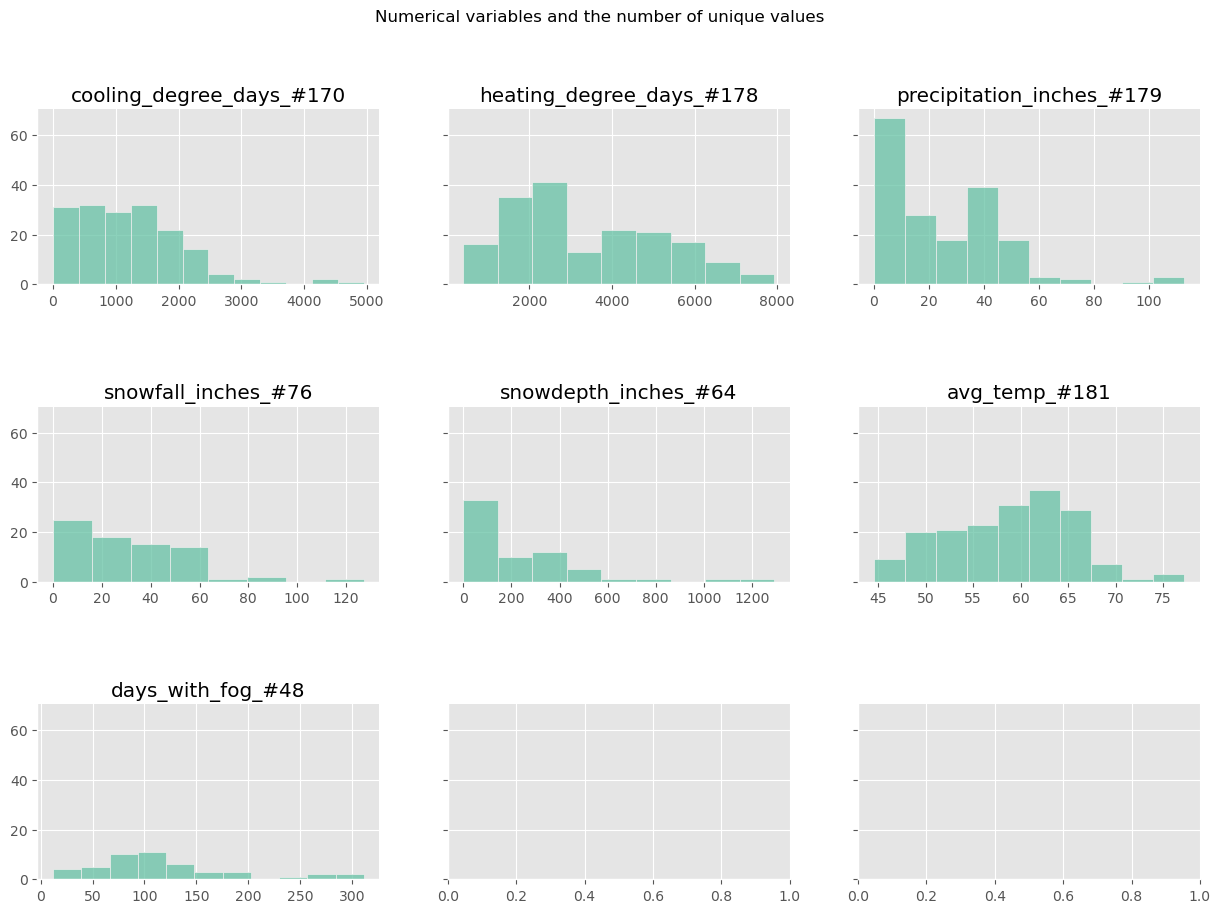

In [35]:
cols=['cooling_degree_days','heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_with_fog']

fig, ax = plt.subplots(3,3, figsize=(15,10), sharey=True)
fig.suptitle("Numerical variables and the number of unique values")

for e, c in enumerate(cols):
    if e<=2:
        sns.histplot(df[c].drop_duplicates(), ax=ax[0,e], legend=False)\
        .set(title=c+"_#"+str(len(df[c].unique())), ylabel=None, xlabel=None)
    elif (e>=3) & (e<=5):
        sns.histplot(df[c].drop_duplicates(), ax=ax[1,e-3], legend=False)\
        .set(title=c+"_#"+str(len(df[c].unique())), ylabel=None, xlabel=None)
    else:
        sns.histplot(df[c].drop_duplicates(), ax=ax[2,e-6], legend=False)\
        .set(title=c+"_#"+str(len(df[c].unique())), ylabel=None, xlabel=None)
        
plt.subplots_adjust(hspace=0.7)

### <span style="font-family:cursive;text-align:center">📌Target Variable Exploration (EUI)</span>

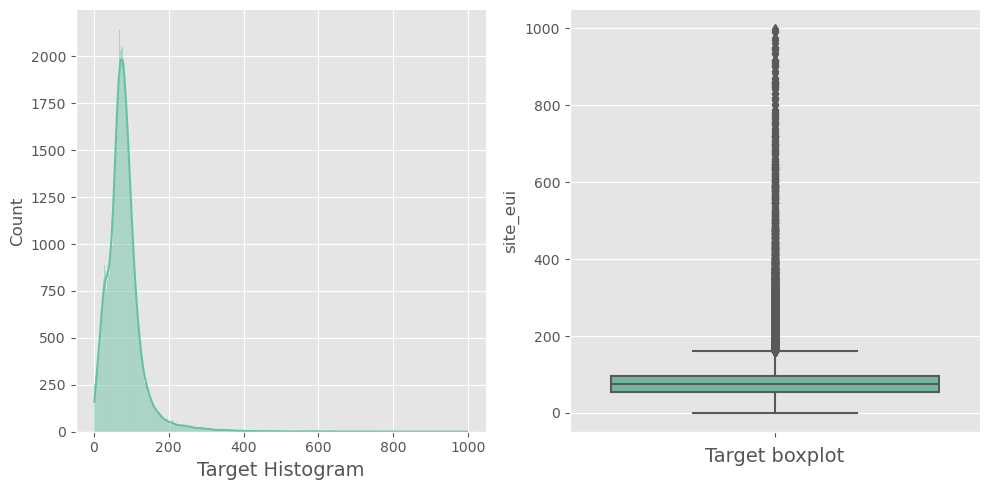

In [36]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
cp = sns.histplot(x=df['site_eui'], kde=True, palette='Set2')
ax1.set_xlabel('Target Histogram', fontsize=14)
ax2 = plt.subplot(1,2,2)
sns.boxplot(y=df['site_eui'], palette='Set2')
ax2.set_xlabel('Target boxplot', fontsize=14)
plt.tight_layout();

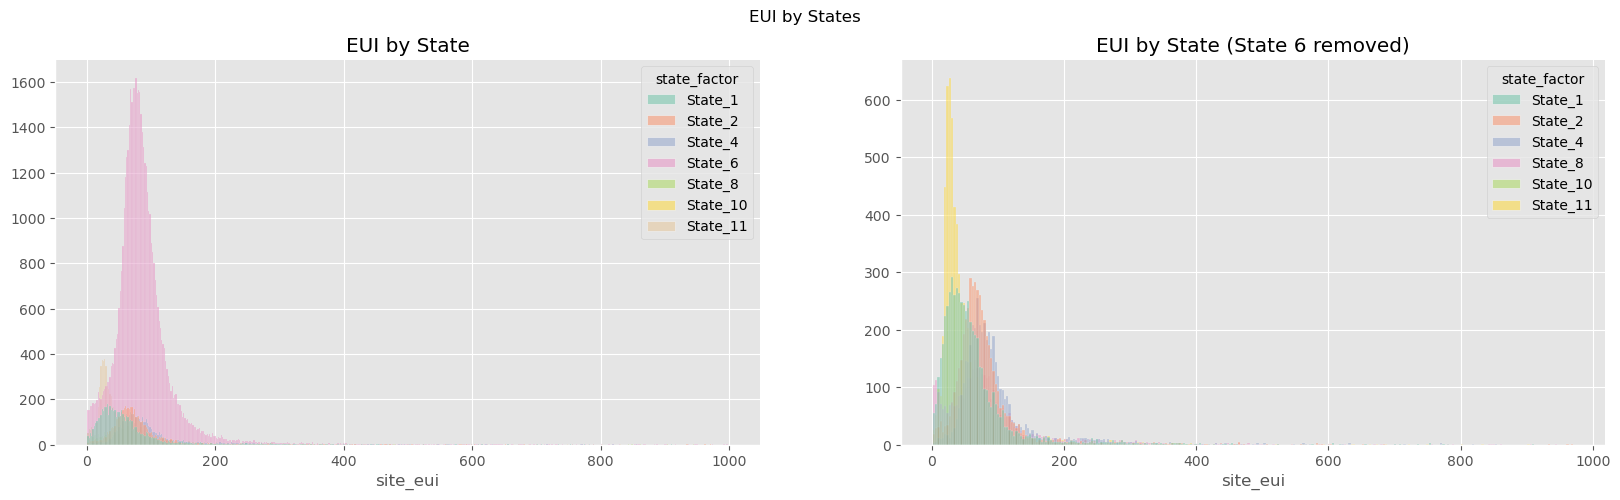

In [37]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("EUI by States")

sns.histplot(df, x='site_eui',hue='state_factor', ax=ax[0])\
.set(title='EUI by State', ylabel=None)

sns.histplot(df[df['state_factor']!='State_6'], x='site_eui', hue='state_factor', ax=ax[1])\
.set(title='EUI by State (State 6 removed)', ylabel=None);

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">State 2 and 4 have slightly higher EUI and State 11 and 8 have lower EUI level.</div>

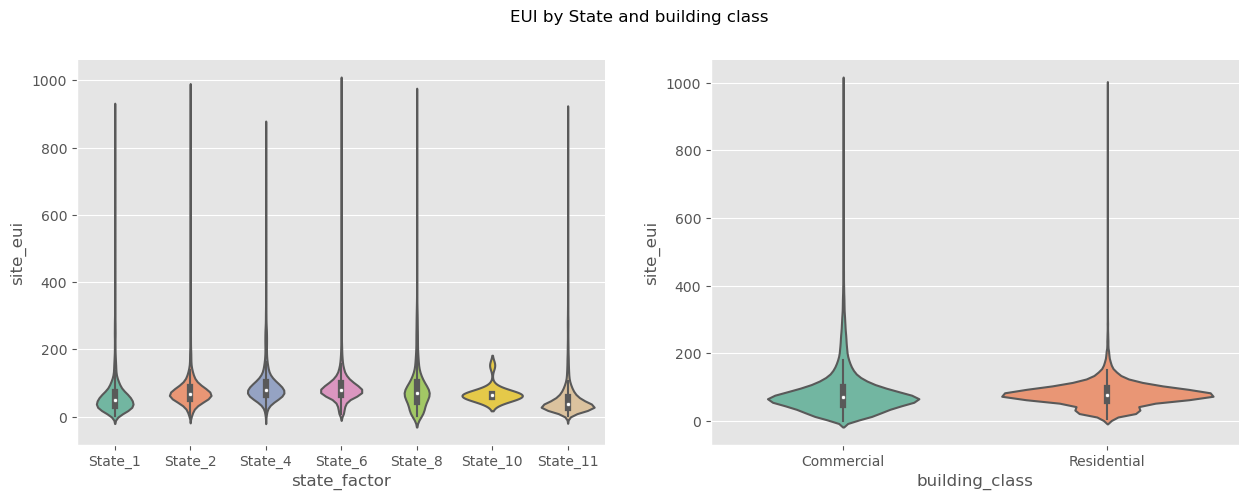

In [38]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("EUI by State and building class")

sns.violinplot(data=df, y='site_eui', x='state_factor', ax=ax[0])
sns.violinplot(data=df, y='site_eui', x='building_class', ax=ax[1]);

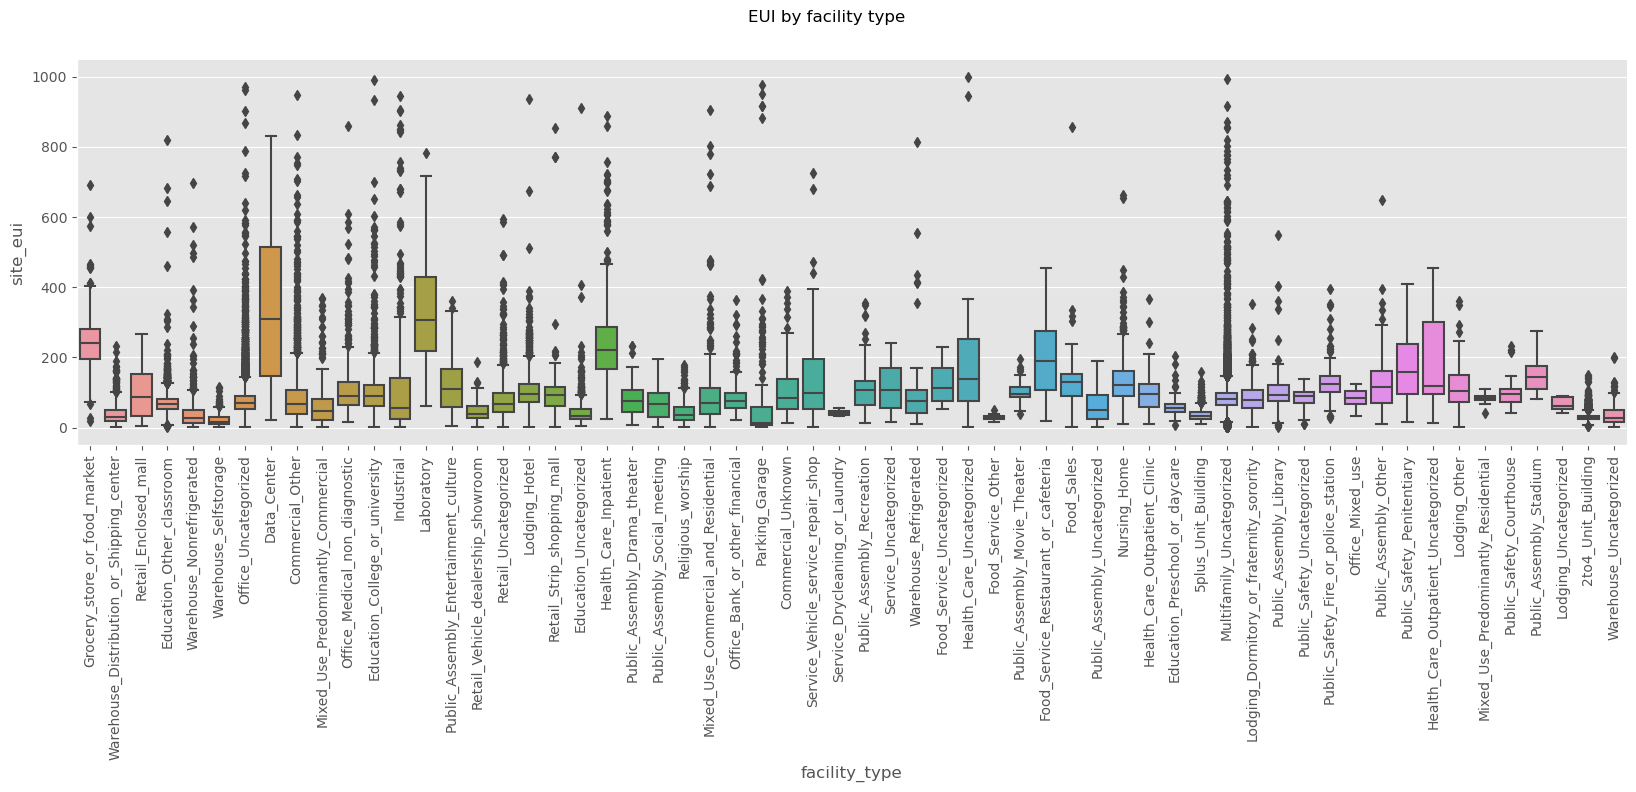

In [39]:
fig, ax = plt.subplots(figsize=(20,5))
fig.suptitle("EUI by facility type")
ax=sns.boxplot(data=df, y='site_eui', x='facility_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">Labs and Data Centers have higher EUI compared to the other types of buildings. Grocery stores, Health Care Inpatient, Health Care Uncategorized, Health Care Outpatient, and Food service, restaurants have higher range of EUI. It could be the essential services must operate for longer hours, therefore, have higher EUI.</div>

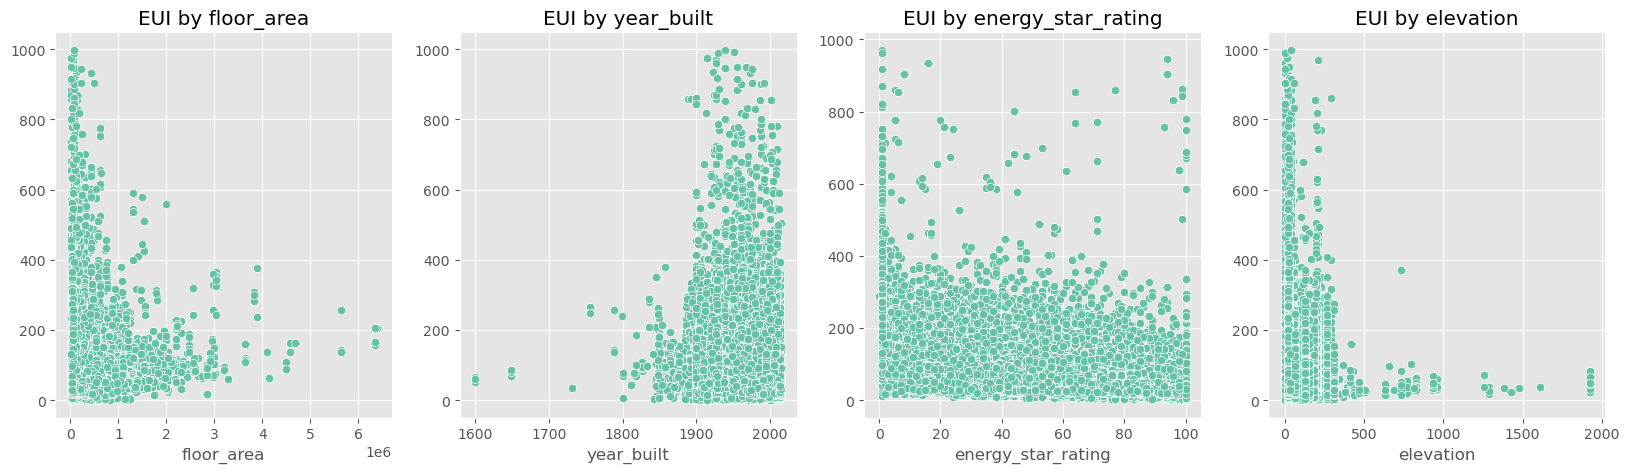

In [40]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

for e, col in enumerate(['floor_area', 'year_built', 'energy_star_rating', 'elevation']):
    if col =='year_built':
        sns.scatterplot(data=df[(df['year_built']!=0) & (df['year_built'].notna())], 
                        x=col, y='site_eui', ax=ax[e]).set(title='EUI by '+ col, ylabel=None)
    else:
        sns.scatterplot(data=df, x=col, y='site_eui', ax=ax[e]).set(title='EUI by '+ col, ylabel=None);

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">`floor_area` could have positive relationship with `EUI`. The younger buildings tend to have higher `EUI` which could be because building height and size have increased over the years. It looks like the Higher the `energy_star_rating` is, the lower the `EUI` becomes.</div>

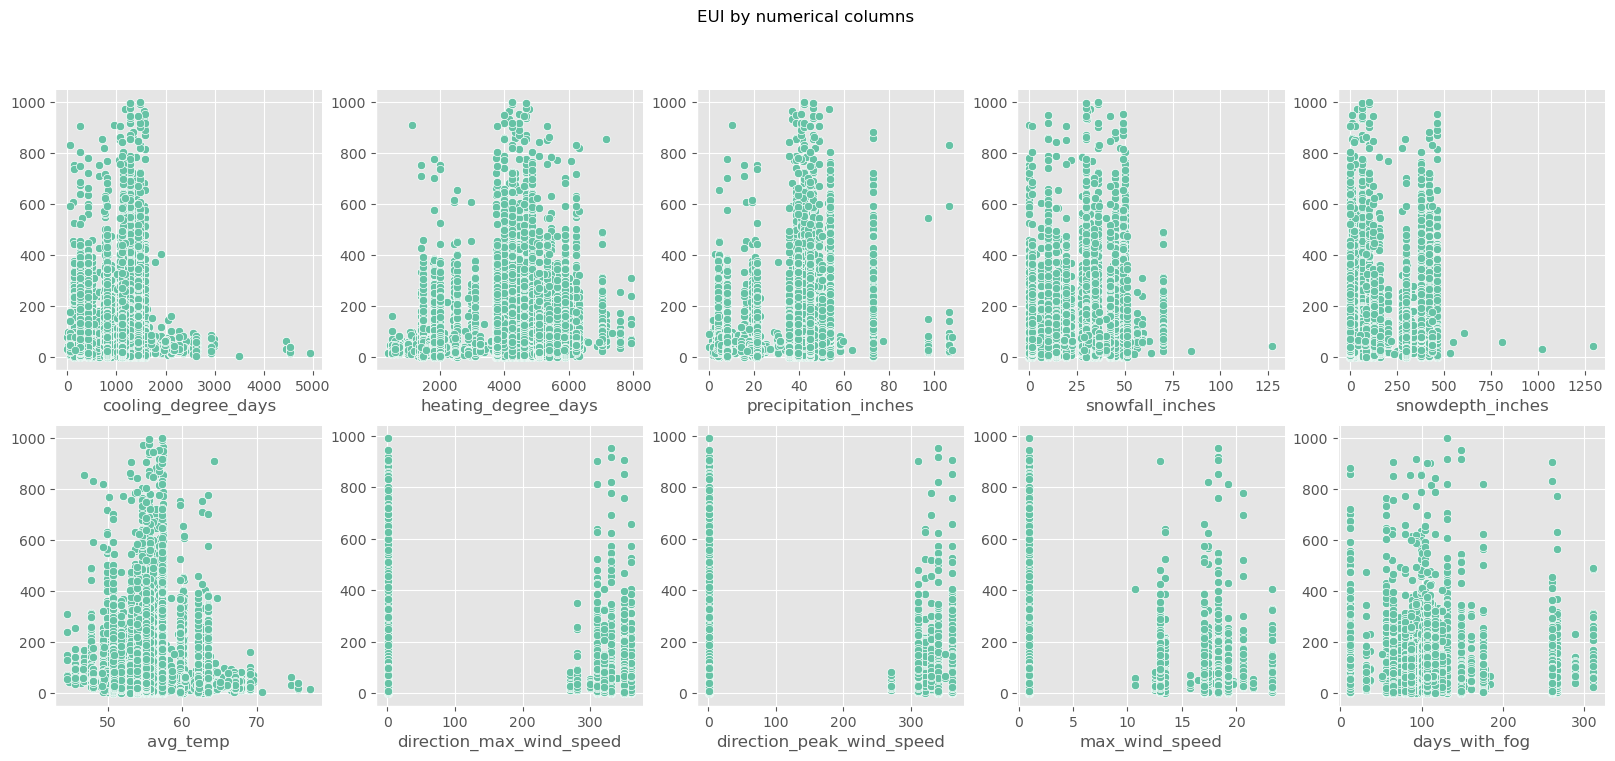

In [41]:
cols=[['cooling_degree_days','heating_degree_days', 'precipitation_inches', 
      'snowfall_inches','snowdepth_inches'], 
      ['avg_temp','direction_max_wind_speed','direction_peak_wind_speed',
       'max_wind_speed', 'days_with_fog']]

fig, ax = plt.subplots(2,5, figsize=(20,8))
fig.suptitle('EUI by numerical columns')

for e1, l in enumerate(cols):
    for e2, col in enumerate(l):
        sns.scatterplot(data=df, 
                        x=col, y='site_eui', ax=ax[e1, e2]).set(ylabel=None);

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">The most data points are in lower number of `cooling_degree_days` and higher number of`heating_degree_days`. The majority of the datapoints are also in the lower levels of `snowfall_inches` and `snowdepth_inches`. `direction_max_wind_speed`, `direction_peak_wind_speed`, `max_wind_speed`, and `days_with_fog` columns have the `NA` values of over 50%. No relationship between `EUI` and the weather related numerica columns can be observed from the plot.</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>

- Categorical variables such as `State_Factor`, `building_class` and `facility_type` might have some correlation with `EUI`.
- `State_6` is not present in `test` set. State 6 removed training data should be tested.
- `floor_area`, `energe_star_rating` should be included in the modelling to be tested.
- From the plots, it's difficult to observe direct (linear) relationship between `EUI` and weather related variables. However, this doesn't deny non-linear relationships among the variables.
- Variables with more than 50% `NA` values should not be imputed (in my opinion) and better to be not included in the training set.
- Weather variables have few unique values repeated throughout the datapoints. Not sure how this duplicated values might affect the modeling and prediction.

# <span style="font-family:cursive;text-align:center">⚙️ Preprocessing</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    we will suppose that two  if two buildings have the same values for these features;   
they are the same building, in other words groupby_cols = (building_id)


Removing duplicates by clubbing similar building data
</div>

In [44]:
#checking Null values
df.isna().sum()[df.isna().sum()>0]

year_built                    1929
energy_star_rating           28963
direction_max_wind_speed     49657
direction_peak_wind_speed    50386
max_wind_speed               49657
days_with_fog                54913
site_eui                      9705
dtype: int64

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    <b>Imputing non categorical columns</b> 
<div>

In [45]:
train_mice = df.copy(deep=True)

mice_imputer = IterativeImputer()
for col in train_mice.drop(list(train_mice.describe(include=['O']).columns)+['site_eui'],axis=1):
    train_mice[col] = mice_imputer.fit_transform(train_mice[[col]])
    if col=='year_built':
        # Rounding up the year since it don't have any fraction
        train_mice['year_built']=train_mice['year_built'].apply(lambda x : round(x))

In [46]:
train_mice.isna().sum()[train_mice.isna().sum()>0]

site_eui    9705
dtype: int64

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    <b>Binnary Encoding</b> 
<div>

In [48]:
import category_encoders as ce
bi_encoder=ce.BinaryEncoder()

dfbi=bi_encoder.fit_transform(train_mice[['facility_type','state_factor','building_class']])
# dfyb=bi_encoder.fit_transform(train_mice['year_built'].astype(str))
df_mice_fl=pd.concat([train_mice,dfbi],axis=1)
df_mice_fl.shape

(85462, 75)

In [49]:
df_mice_fl.head()

year_factor state_factor building_class  \
0          1.0      State_1     Commercial   
1          1.0      State_1     Commercial   
2          1.0      State_1     Commercial   
3          1.0      State_1     Commercial   
4          1.0      State_1     Commercial   

                               facility_type  year_built  january_min_temp  \
0               Grocery_store_or_food_market        1942              36.0   
1  Warehouse_Distribution_or_Shipping_center        1955              36.0   
2                       Retail_Enclosed_mall        1951              36.0   
3                  Education_Other_classroom        1980              36.0   
4                  Warehouse_Nonrefrigerated        1985              36.0   

   january_avg_temp  january_max_temp  february_min_temp  february_avg_temp  \
0              50.5              68.0               35.0          50.589286   
1              50.5              68.0               35.0          50.589286   
2              50.5              68.0               35.0          50.589286   
3              50.5              68.0               35.0          50.589286   
4              50.5              68.0               35.0          50.589286   

   february_max_temp  march_min_temp  march_avg_temp  march_max_temp  \
0               73.0            40.0       53.693548            80.0   
1               73.0            40.0       53.693548            80.0   
2               73.0            40.0       53.693548            80.0   
3               73.0            40.0       53.693548            80.0   
4               73.0            40.0       53.693548            80.0   

   april_min_temp  april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
0            41.0            55.5            78.0          46.0     56.854839   
1            41.0            55.5            78.0          46.0     56.854839   
2            41.0            55.5            78.0          46.0     56.854839   
3            41.0            55.5            78.0          46.0     56.854839   
4            41.0            55.5            78.0          46.0     56.854839   

   may_max_temp  june_min_temp  june_avg_temp  june_max_temp  july_min_temp  \
0          84.0           50.0           60.5           90.0           52.0   
1          84.0           50.0           60.5           90.0           52.0   
2          84.0           50.0           60.5           90.0           52.0   
3          84.0           50.0           60.5           90.0           52.0   
4          84.0           50.0           60.5           90.0           52.0   

   july_avg_temp  july_max_temp  august_min_temp  august_avg_temp  \
0      62.725806           84.0             52.0         62.16129   
1      62.725806           84.0             52.0         62.16129   
2      62.725806           84.0             52.0         62.16129   
3      62.725806           84.0             52.0         62.16129   
4      62.725806           84.0             52.0         62.16129   

   august_max_temp  september_min_temp  september_avg_temp  \
0             85.0                52.0               64.65   
1             85.0                52.0               64.65   
2             85.0                52.0               64.65   
3             85.0                52.0               64.65   
4             85.0                52.0               64.65   

   september_max_temp  october_min_temp  october_avg_temp  october_max_temp  \
0                90.0              47.0         63.016129              83.0   
1                90.0              47.0         63.016129              83.0   
2                90.0              47.0         63.016129              83.0   
3                90.0              47.0         63.016129              83.0   
4                90.0              47.0         63.016129              83.0   

   ...  december_max_temp  cooling_degree_days  heating_degree_days  \
0  ...               71.0                115.0       

In [50]:
df_mice_fl=df_mice_fl.drop(['state_factor','facility_type','building_class'],axis=1)
df_mice_fl.head()

year_factor  year_built  january_min_temp  january_avg_temp  \
0          1.0        1942              36.0              50.5   
1          1.0        1955              36.0              50.5   
2          1.0        1951              36.0              50.5   
3          1.0        1980              36.0              50.5   
4          1.0        1985              36.0              50.5   

   january_max_temp  february_min_temp  february_avg_temp  february_max_temp  \
0              68.0               35.0          50.589286               73.0   
1              68.0               35.0          50.589286               73.0   
2              68.0               35.0          50.589286               73.0   
3              68.0               35.0          50.589286               73.0   
4              68.0               35.0          50.589286               73.0   

   march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0            40.0       53.693548            80.0            41.0   
1            40.0       53.693548            80.0            41.0   
2            40.0       53.693548            80.0            41.0   
3            40.0       53.693548            80.0            41.0   
4            40.0       53.693548            80.0            41.0   

   april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  may_max_temp  \
0            55.5            78.0          46.0     56.854839          84.0   
1            55.5            78.0          46.0     56.854839          84.0   
2            55.5            78.0          46.0     56.854839          84.0   
3            55.5            78.0          46.0     56.854839          84.0   
4            55.5            78.0          46.0     56.854839          84.0   

   june_min_temp  june_avg_temp  june_max_temp  july_min_temp  july_avg_temp  \
0           50.0           60.5           90.0           52.0      62.725806   
1           50.0           60.5           90.0           52.0      62.725806   
2           50.0           60.5           90.0           52.0      62.725806   
3           50.0           60.5           90.0           52.0      62.725806   
4           50.0           60.5           90.0           52.0      62.725806   

   july_max_temp  august_min_temp  august_avg_temp  august_max_temp  \
0           84.0             52.0         62.16129             85.0   
1           84.0             52.0         62.16129             85.0   
2           84.0             52.0         62.16129             85.0   
3           84.0             52.0         62.16129             85.0   
4           84.0             52.0         62.16129             85.0   

   september_min_temp  september_avg_temp  september_max_temp  \
0                52.0               64.65                90.0   
1                52.0               64.65                90.0   
2                52.0               64.65                90.0   
3                52.0               64.65                90.0   
4                52.0               64.65                90.0   

   october_min_temp  october_avg_temp  october_max_temp  november_min_temp  \
0              47.0         63.016129              83.0               43.0   
1              47.0         63.016129              83.0               43.0   
2              47.0         63.016129              83.0               43.0   
3              47.0         63.016129              83.0               43.0   
4              47.0         63.016129              83.0               43.0   

   november_avg_temp  november_max_temp  ...  december_max_temp  \
0               53.8               72.0  ...               71.0   
1               53.8               72.0  ...               71.0   
2               53.8               72.0  ...               71.0   
3               53.8               72.0  ...               71.0   
4               53.8               72.0  ...               71.0   

   cooling_degree_days  heating_degree_days  precipitation_inche

# <span style="font-family:cursive;text-align:center">Feature Engineering</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 
    <font size='3.5pt'><b>Buildig based feature:</b></font>

we will extract building statistics

In [47]:
# total area
df_mice_fl['building_area'] = df_mice_fl['floor_area'] * df_mice_fl['elevation']
# rating energy by floor
df_mice_fl['floor_energy_star_rating'] = df_mice_fl['energy_star_rating']/train_mice['elevation']

df_mice_fl=df_mice_fl.drop(['floor_area','elevation','energy_star_rating'],axis=1)

df_mice_fl

year_factor state_factor building_class  \
0              1.0      State_1     Commercial   
1              1.0      State_1     Commercial   
2              1.0      State_1     Commercial   
3              1.0      State_1     Commercial   
4              1.0      State_1     Commercial   
...            ...          ...            ...   
85457          7.0     State_11    Residential   
85458          7.0     State_11    Residential   
85459          7.0     State_11    Residential   
85460          7.0     State_11    Residential   
85461          7.0     State_11    Residential   

                                   facility_type  year_built  \
0                   Grocery_store_or_food_market        1942   
1      Warehouse_Distribution_or_Shipping_center        1955   
2                           Retail_Enclosed_mall        1951   
3                      Education_Other_classroom        1980   
4                      Warehouse_Nonrefrigerated        1985   
...                                          ...         ...   
85457                        5plus_Unit_Building        2013   
85458                        5plus_Unit_Building        1910   
85459                        5plus_Unit_Building        2014   
85460                        5plus_Unit_Building        1992   
85461                        5plus_Unit_Building        1994   

       january_min_temp  january_avg_temp  january_max_temp  \
0                  36.0          50.50000              68.0   
1                  36.0          50.50000              68.0   
2                  36.0          50.50000              68.0   
3                  36.0          50.50000              68.0   
4                  36.0          50.50000              68.0   
...                 ...               ...               ...   
85457              21.0          38.66129              54.0   
85458              21.0          38.66129              54.0   
85459              21.0          38.66129              54.0   
85460              21.0          38.66129              54.0   
85461              21.0          38.66129              54.0   

       february_min_temp  february_avg_temp  february_max_temp  \
0                   35.0          50.589286               73.0   
1                   35.0          50.589286               73.0   
2                   35.0          50.589286               73.0   
3                   35.0          50.589286               73.0   
4                   35.0          50.589286               73.0   
...                  ...                ...                ...   
85457               28.0          41.625000               59.0   
85458               28.0          41.625000               59.0   
85459               28.0          41.625000               59.0   
85460               28.0          41.625000               59.0   
85461               28.0          41.625000               59.0   

       march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0                40.0       53.693548            80.0            41.0   
1                40.0       53.693548            80.0            41.0   
2                40.0       53.693548            80.0            41.0   
3                40.0       53.693548            80.0            41.0   
4                40.0       53.693548            80.0            41.0   
...               ...             ...             ...             ...   
85457            33.0       46.500000            59.0            37.0   
85458            33.0       46.500000            59.0            37.0   
85459            33.0       46.500000            59.0            37.0   
85460            33.0       46.500000            59.0            37.0   
85461            33.0       46.500000            59.0            37.0   

       april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
0           55.500000            78.0          46.0     56.854839   
1           55.500000            78.0          46.0     56.854839   
2  

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 
    <font size='3.5pt'><b>Weather based features</b></font>

we will extract new weather statistics from the building location weather features

In [51]:
df_all_te = df_mice_fl.copy()

In [52]:
# extract new weather statistics from the building location weather features
temp = [col for col in df_all_te.columns if 'temp' in col]


# by seasons
temp = pd.Series([col for col in df_all_te.columns if 'temp' in col])

winter_temp = temp[temp.apply(lambda x: ('january' in x or 'february' in x or 'december' in x))].values
spring_temp = temp[temp.apply(lambda x: ('march' in x or 'april' in x or 'may' in x))].values
summer_temp = temp[temp.apply(lambda x: ('june' in x or 'july' in x or 'august' in x))].values
autumn_temp = temp[temp.apply(lambda x: ('september' in x or 'october' in x or 'november' in x))].values


### winter
df_all_te['median_winter_temp'] = df_all_te[winter_temp].median(axis=1)
df_all_te['std_winter_temp'] = df_all_te[winter_temp].std(axis=1)

### spring
df_all_te['median_spring_temp'] = df_all_te[spring_temp].median(axis=1)
df_all_te['std_spring_temp'] = df_all_te[spring_temp].std(axis=1)

### summer
df_all_te['median_summer_temp'] = df_all_te[summer_temp].median(axis=1)
df_all_te['std_summer_temp'] = df_all_te[summer_temp].std(axis=1)

## autumn
df_all_te['median_autumn_temp'] = df_all_te[autumn_temp].median(axis=1)
df_all_te['std_autumn_temp'] = df_all_te[autumn_temp].std(axis=1)

In [53]:
# # extract new weather statistics from the building location weather features
# temp = [col for col in df_all_te.columns if 'temp' in col]

# df_all_te['min_temp'] = df_all_te[temp].min(axis=1)
# df_all_te['max_temp'] = df_all_te[temp].max(axis=1)
# df_all_te['avg_temp'] = df_all_te[temp].mean(axis=1)
# df_all_te['std_temp'] = df_all_te[temp].std(axis=1)
# df_all_te['skew_temp'] = df_all_te[temp].skew(axis=1)


# # by seasons
# temp = pd.Series([col for col in df_all_te.columns if 'temp' in col])

# winter_temp = temp[temp.apply(lambda x: ('january' in x or 'february' in x or 'december' in x))].values
# spring_temp = temp[temp.apply(lambda x: ('march' in x or 'april' in x or 'may' in x))].values
# summer_temp = temp[temp.apply(lambda x: ('june' in x or 'july' in x or 'august' in x))].values
# autumn_temp = temp[temp.apply(lambda x: ('september' in x or 'october' in x or 'november' in x))].values


# ### winter
# df_all_te['min_winter_temp'] = df_all_te[winter_temp].min(axis=1)
# df_all_te['max_winter_temp'] = df_all_te[winter_temp].max(axis=1)
# df_all_te['avg_winter_temp'] = df_all_te[winter_temp].mean(axis=1)
# df_all_te['std_winter_temp'] = df_all_te[winter_temp].std(axis=1)
# df_all_te['skew_winter_temp'] = df_all_te[winter_temp].skew(axis=1)
# ### spring
# df_all_te['min_spring_temp'] = df_all_te[spring_temp].min(axis=1)
# df_all_te['max_spring_temp'] = df_all_te[spring_temp].max(axis=1)
# df_all_te['avg_spring_temp'] = df_all_te[spring_temp].mean(axis=1)
# df_all_te['std_spring_temp'] = df_all_te[spring_temp].std(axis=1)
# df_all_te['skew_spring_temp'] = df_all_te[spring_temp].skew(axis=1)
# ### summer
# df_all_te['min_summer_temp'] = df_all_te[summer_temp].min(axis=1)
# df_all_te['max_summer_temp'] = df_all_te[summer_temp].max(axis=1)
# df_all_te['avg_summer_temp'] = df_all_te[summer_temp].mean(axis=1)
# df_all_te['std_summer_temp'] = df_all_te[summer_temp].max(axis=1)
# df_all_te['skew_summer_temp'] = df_all_te[summer_temp].max(axis=1)
# ## autumn
# df_all_te['min_autumn_temp'] = df_all_te[autumn_temp].min(axis=1)
# df_all_te['max_autumn_temp'] = df_all_te[autumn_temp].max(axis=1)
# df_all_te['avg_autumn_temp'] = df_all_te[autumn_temp].mean(axis=1)
# df_all_te['std_autumn_temp'] = df_all_te[autumn_temp].std(axis=1)
# df_all_te['skew_autumn_temp'] = df_all_te[autumn_temp].skew(axis=1)

In [54]:
df_all_te['month_cooling_degree_days'] = df_all_te['cooling_degree_days']/12
df_all_te['month_heating_degree_days'] = df_all_te['heating_degree_days']/12

In [55]:
df_all_te=df_all_te.drop(list(temp)+['month_cooling_degree_days','month_heating_degree_days'],axis=1)

In [56]:
df_all_te.shape

(85462, 43)

### <span style="font-family:cursive;text-align:center">Checking target variable transformation</span>

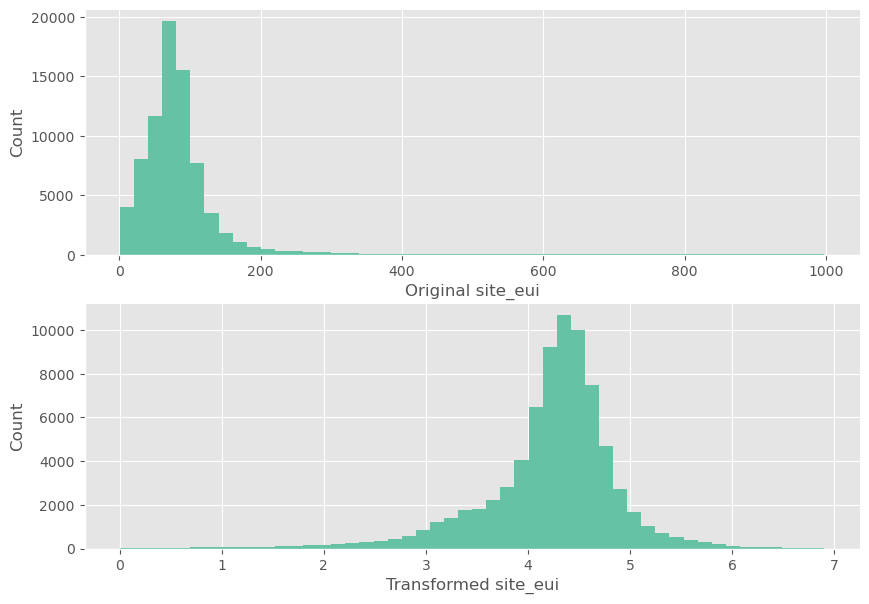

In [57]:
target = 'site_eui'
plt.figure(figsize=(10,7))
# plot the original variable vs sale price    
plt.subplot(2, 1, 1)
df_train[target].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Original ' + target)

# plot transformed variable vs sale price
plt.subplot(2, 1, 2)
np.log(df_train[target]).hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Transformed ' + target);

In [58]:
nums = df_all_te.loc[:, df_all_te.dtypes != 'object'].columns
df_all_te[nums].skew().sort_values(key=abs, ascending=False)[:5]

days_above_110f    89.873857
days_above_100f    24.615438
year_built        -11.842043
building_area      10.887223
site_eui            4.739972
dtype: float64

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 
    Binarize very skewed variables

In [59]:
skewed = ['days_above_110f', 'days_above_100f']

for var in skewed:
    
    # map the variable values into 0 and 1
    df_all_te[var] = np.where(df_all_te[var]==0, 0, 1)

In [60]:
df_all_te

year_factor  year_built  cooling_degree_days  heating_degree_days  \
0              1.0        1942                115.0               2960.0   
1              1.0        1955                115.0               2960.0   
2              1.0        1951                115.0               2960.0   
3              1.0        1980                115.0               2960.0   
4              1.0        1985                115.0               2960.0   
...            ...         ...                  ...                  ...   
85457          7.0        2013                345.0               4478.0   
85458          7.0        1910                345.0               4478.0   
85459          7.0        2014                345.0               4478.0   
85460          7.0        1992                345.0               4478.0   
85461          7.0        1994                345.0               4478.0   

       precipitation_inches  snowfall_inches  snowdepth_inches  \
0                     16.59              0.0               0.0   
1                     16.59              0.0               0.0   
2                     16.59              0.0               0.0   
3                     16.59              0.0               0.0   
4                     16.59              0.0               0.0   
...                     ...              ...               ...   
85457                 44.83              4.0              10.0   
85458                 44.83              4.0              10.0   
85459                 44.83              4.0              10.0   
85460                 44.83              4.0              10.0   
85461                 44.83              4.0              10.0   

       days_below_30f  days_below_20f  days_below_10f  days_below_0f  \
0                 0.0             0.0             0.0            0.0   
1                 0.0             0.0             0.0            0.0   
2                 0.0             0.0             0.0            0.0   
3                 0.0             0.0             0.0            0.0   
4                 0.0             0.0             0.0            0.0   
...               ...             ...             ...            ...   
85457            17.0             0.0             0.0            0.0   
85458            17.0             0.0             0.0            0.0   
85459            17.0             0.0             0.0            0.0   
85460            17.0             0.0             0.0            0.0   
85461            17.0             0.0             0.0            0.0   

       days_above_80f  days_above_90f  days_above_100f  days_above_110f  \
0                14.0             0.0                0                0   
1                14.0             0.0                0                0   
2                14.0             0.0                0                0   
3                14.0             0.0                0                0   
4                14.0             0.0                0                0   
...               ...             ...              ...              ...   
85457            39.0             3.0                0                0   
85458            39.0             3.0                0                0   
85459            39.0             3.0                0                0   
85460            39.0             3.0                0                0   
85461            39.0             3.0                0                0   

       direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
0                      1.000000                   1.000000        1.000000   
1                      1.000000                  70.750627        1.000000   
2                      1.000000                  70.750627        1.000000   
3                      1.000000                  70.750627        1.000000   
4                      1.000000                   1.000000        1.000000   
...                         ...                        ...         

### <span style="font-family:cursive;text-align:center">Saving feature dataset</span>

In [61]:
saved = False
if saved:
    !pip install pickle5 --quiet
    import pickle5 as pickle
    data_path = 'F:\\1.Study Materials\\kaggel\\TMC MegaGP\\P2\\transform_feature_data.pkl'
    with open(data_path, "rb") as fh:
        df = pickle.load(fh)
else:
    df_all_te.to_pickle('F:\\1.Study Materials\\kaggel\\TMC MegaGP\\P2\\transform_feature_data.pkl')

# <span style="font-family:cursive;text-align:center">🧰 Baseline Modelling</span>

### <span style="font-family:cursive;text-align:center">Separating test data</span>

In [62]:
train = df_all_te[df_all_te['dataset']=='train']
test = df_all_te[df_all_te['dataset']=='test']

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

test_ids = test['id']
train_ids = train['id']

target = train['site_eui'] #y_train

train = train.drop(['id', 'dataset', 'site_eui'], axis=1) #X_train
test = test.drop(['id', 'dataset', 'site_eui'], axis=1) #X_test



In [63]:
y_test=pd.read_csv('F:\\1.Study Materials\\kaggel\\TMC MegaGP\\P2\\y_test.csv')
y_test.head()

id    site_eui
0  75757  166.588554
1  75758  259.381565
2  75759  158.537090
3  75760  261.441520
4  75761  242.967711

In [64]:
X_train = train
X_test = test
y_train = target
y_test = y_test['site_eui']
print('Train: ', X_train.shape)
print('Test:', X_test.shape)
print('Samples: ', y_train.shape)
print('Targets: ', y_test.shape)

Train:  (75757, 40)
Test: (9705, 40)
Samples:  (75757,)
Targets:  (9705,)


<AxesSubplot:>

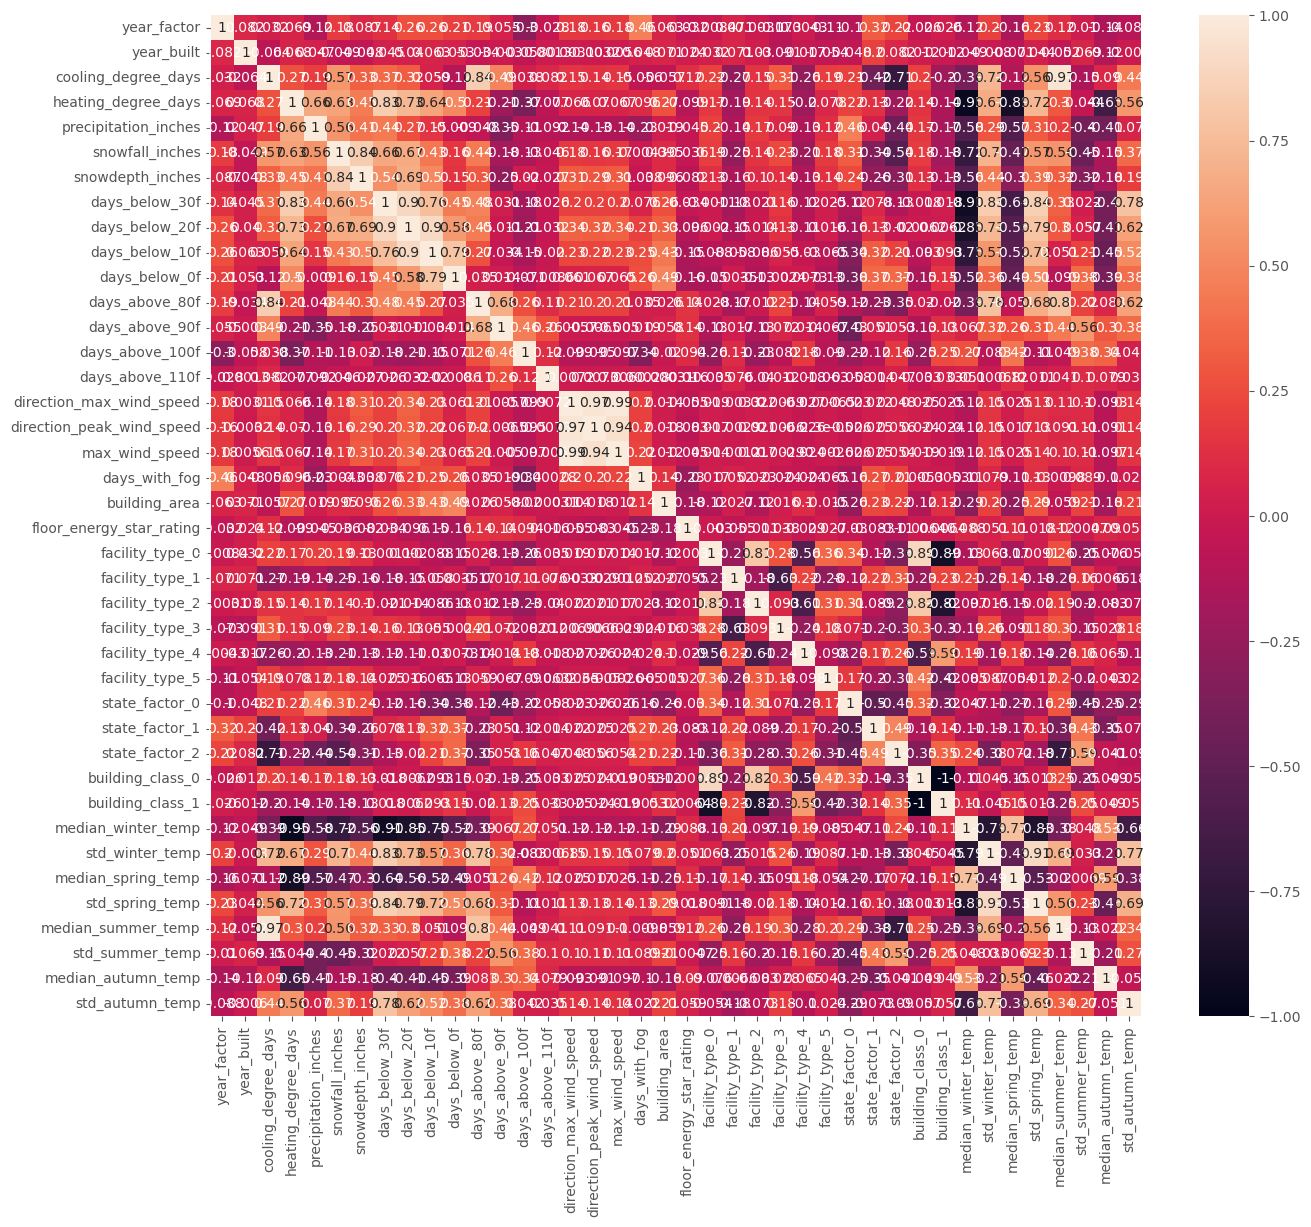

In [65]:
plt.figure(figsize=(15,13))
sns.heatmap(X_train.corr(),annot=True)

In [66]:
# get discrete end categorical features colums indexes 
# needed later for the cat bosst model
cats_discrete_idx = np.where(train.dtypes != 'float64')[0]
cats_discrete_idx

array([ 1, 13, 14, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [67]:
catb = CatBoostRegressor(iterations=500,
                         learning_rate=0.02,
                         depth=12,
                         eval_metric='RMSE',
#                         early_stopping_rounds=42,
                         random_seed = 23,
                         bagging_temperature = 0.2,
                         od_type='Iter',
                         metric_period = 75,
                         od_wait=100
                        )

In [68]:
catb.fit(X_train, y_train,
                 eval_set=(X_test,y_test),
                 cat_features=cats_discrete_idx,
                 use_best_model=True,
                 verbose=True)

y_pred = catb.predict(X_test)

0:	learn: 57.8965713	test: 60.6450145	best: 60.6450145 (0)	total: 375ms	remaining: 3m 6s
75:	learn: 45.6557164	test: 47.4580748	best: 47.4580748 (75)	total: 26.8s	remaining: 2m 29s
150:	learn: 42.8611746	test: 45.7113416	best: 45.6959441 (148)	total: 54.5s	remaining: 2m 6s
225:	learn: 41.5730215	test: 45.0650955	best: 45.0650955 (225)	total: 1m 20s	remaining: 1m 37s
300:	learn: 40.6054986	test: 44.5707383	best: 44.5707383 (300)	total: 1m 46s	remaining: 1m 10s
375:	learn: 39.9468517	test: 44.3243279	best: 44.3243279 (375)	total: 2m 11s	remaining: 43.4s
450:	learn: 39.3544541	test: 44.1002969	best: 44.1002969 (450)	total: 2m 37s	remaining: 17.1s
499:	learn: 39.0026873	test: 44.0253569	best: 44.0101304 (487)	total: 2m 53s	remaining: 0us

bestTest = 44.01013045
bestIteration = 487

Shrink model to first 488 iterations.


In [72]:
print(" Training data scores\n","--"*10)
catb_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
catb_mae=mean_absolute_error(y_test,y_pred)
print(" RMSE:", catb_rmse)
print(" MAE:", catb_mae)
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 44.01013049033549
 MAE: 27.240528476563153
 MSE: 1936.8915857763577
 R2: 0.46430742804415814


In [76]:
xgb = XGBRegressor(n_estimators=500, reg_alpha=0.01, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [77]:
print(" Training data scores\n","--"*10)
xgb_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
xgb_mae=mean_absolute_error(y_test,y_pred)
print(" RMSE:", xgb_rmse)
print(" MAE:", xgb_mae)
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 58.32259869549214
 MAE: 39.98923719473493
 MSE: 3401.525518595421
 R2: 0.05922873174161947


In [78]:
rf = RandomForestRegressor(random_state=42, criterion='friedman_mse', max_depth = 15, min_samples_split= 2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [79]:
print(" Training data scores\n","--"*10)
rf_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rf_mae=mean_absolute_error(y_test,y_pred)
print(" RMSE:", rf_rmse)
print(" MAE:", rf_mae)
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 48.47899435996129
 MAE: 31.141972800926364
 MSE: 2350.2128941531587
 R2: 0.3499937739633213


In [80]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [81]:
print(" Training data scores\n","--"*10)
lasso_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
lasso_mae=mean_absolute_error(y_test,y_pred)
print(" RMSE:", lasso_rmse)
print(" MAE:", lasso_mae)
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 57.73415450562307
 MAE: 33.92316728732606
 MSE: 3333.232596479156
 R2: 0.07811673319895351


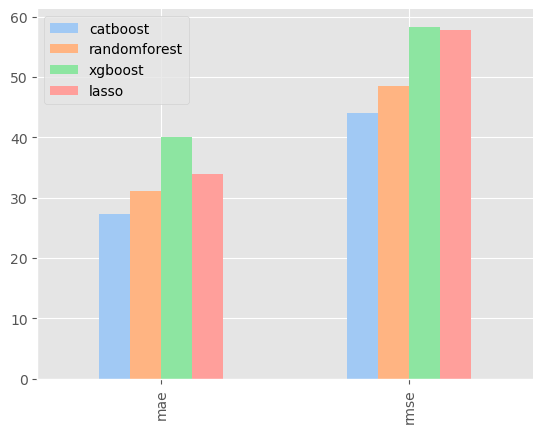

In [82]:
error_rec = {
    "catboost": {
        "mae": catb_mae,
        "rmse": catb_rmse,
    },
    "randomforest": {
        "mae": rf_mae,
        "rmse": rf_rmse,
    },
    "xgboost": {
         "mae": xgb_mae,
        "rmse": xgb_rmse,
    },
    "lasso": {
         "mae": lasso_mae,
        "rmse": lasso_rmse,
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

In [ ]:
# prepaere the out of folds predictions 
train_oof = np.zeros((train.shape[0],))
test_preds = np.zeros(test.shape[0])

NUM_FOLDS = 5
kf = KFold(n_splits = NUM_FOLDS, shuffle=True, random_state=0)


for fold, (train_idx, test_idx) in tqdm.tqdm(enumerate(kf.split(train, target))):
    X_train, X_test = train.iloc[train_idx][test.columns], train.iloc[test_idx][test.columns]
    y_train, y_test = target[train_idx], target[test_idx]
    
    catb = CatBoostRegressor(iterations=500,
                         learning_rate=0.02,
                         depth=12,
                         eval_metric='RMSE',
#                         early_stopping_rounds=42,
                         random_seed = 23,
                         bagging_temperature = 0.2,
                         od_type='Iter',
                         metric_period = 75,
                         od_wait=100)
    # train model
    catb.fit(X_train, y_train,
                 eval_set=(X_test,y_test),
                 cat_features=cats_discrete_idx,
                 use_best_model=True,
                 verbose=True)

    oof = catb.predict(X_test)
    train_oof[test_idx] = oof
    test_preds += catb.predict(test)/NUM_FOLDS      
    print(f"out-of-folds prdiction ==== fold_{fold} RMSE",np.sqrt(mean_squared_error(oof, y_test, squared=False)))


# Hyper Parameter Tuning

In [86]:
# cross validating training data
kfolds = KFold(n_splits=3, shuffle=True, random_state=42)

# Objective function
def catb_objective(trial, data=X_train, target=y_train):
    # Dictionary to store best parameters
    param = {
        "iterations": trial.suggest_int("iterations", 200, 500),
        "depth": trial.suggest_int("depth", 5, 15),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.2,0.6),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.5)
    }
     
    model = CatBoostRegressor(**param,
                              metric_period = 100,
                              eval_metric='RMSE',
                             )
    
    # Setting random seed and kfolds for cross-validation
    kfolds = KFold(n_splits=5, shuffle=True, random_state=42)
    
    scores = cross_val_score(model, data, target, cv=kfolds, scoring="neg_root_mean_squared_error")
    return scores.mean()

In [87]:
def tuner(objective, n=5, direction='maximize'): 
    # Create Study object
    study = optuna.create_study(direction="maximize")

    # Optimize the study
    study.optimize(objective, n_trials=n)

    # Print the result
    best_params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}")
    print(f"Optimized parameters: {best_params}\n")
    print("<<<<<<<<<< Tuning complete... >>>>>>>>>>")
    
    # Return best parameters for the model
    return best_params, best_score

In [88]:
%%time
catb_param, catb_score = tuner(catb_objective,10)
# rf_tuned_model = RandomForestRegressor(**rf_param)

[I 2023-05-16 10:39:22,090] A new study created in memory with name: no-name-6405d351-8ff3-4c58-8794-208df190574a


0:	learn: 54.8308409	total: 10.9ms	remaining: 4.87s
100:	learn: 43.5085570	total: 994ms	remaining: 3.42s
200:	learn: 40.9028173	total: 2.02s	remaining: 2.49s
300:	learn: 39.3601391	total: 3s	remaining: 1.48s
400:	learn: 38.0662715	total: 3.98s	remaining: 476ms
448:	learn: 37.5079545	total: 4.46s	remaining: 0us
0:	learn: 55.5762789	total: 11.4ms	remaining: 5.13s
100:	learn: 43.3344539	total: 1.12s	remaining: 3.86s
200:	learn: 40.8180220	total: 2.22s	remaining: 2.74s
300:	learn: 39.3533947	total: 3.35s	remaining: 1.65s
400:	learn: 38.2158855	total: 4.36s	remaining: 522ms
448:	learn: 37.7212233	total: 4.86s	remaining: 0us
0:	learn: 54.9530176	total: 11.8ms	remaining: 5.3s
100:	learn: 43.2297721	total: 1.1s	remaining: 3.78s
200:	learn: 40.7223053	total: 2.09s	remaining: 2.58s
300:	learn: 38.9081570	total: 3.08s	remaining: 1.52s
400:	learn: 37.7569865	total: 4.09s	remaining: 490ms
448:	learn: 37.2443977	total: 4.58s	remaining: 0us
0:	learn: 54.6154608	total: 11.2ms	remaining: 5.01s
100:	lea

[I 2023-05-16 10:39:46,813] Trial 0 finished with value: -44.99939580666203 and parameters: {'iterations': 449, 'depth': 5, 'bagging_temperature': 0.26181241417937506, 'learning_rate': 0.4816923555470215}. Best is trial 0 with value: -44.99939580666203.


448:	learn: 37.3644712	total: 4.85s	remaining: 0us
0:	learn: 54.3238664	total: 393ms	remaining: 1m 36s
100:	learn: 34.1138180	total: 40.2s	remaining: 58.1s
200:	learn: 29.7098213	total: 1m 18s	remaining: 17.9s
246:	learn: 28.2692285	total: 1m 35s	remaining: 0us
0:	learn: 55.1158887	total: 415ms	remaining: 1m 41s
100:	learn: 33.7661918	total: 40.8s	remaining: 59s
200:	learn: 29.6027068	total: 1m 21s	remaining: 18.7s
246:	learn: 28.1733955	total: 1m 41s	remaining: 0us
0:	learn: 54.5224417	total: 435ms	remaining: 1m 47s
100:	learn: 33.2994909	total: 40s	remaining: 57.8s
200:	learn: 28.9464432	total: 1m 18s	remaining: 18s
246:	learn: 27.6870021	total: 1m 37s	remaining: 0us
0:	learn: 54.1426396	total: 455ms	remaining: 1m 52s
100:	learn: 34.3290365	total: 41.3s	remaining: 59.7s
200:	learn: 30.0195430	total: 1m 23s	remaining: 19s
246:	learn: 28.7214041	total: 1m 42s	remaining: 0us
0:	learn: 54.4701669	total: 423ms	remaining: 1m 44s
100:	learn: 33.5725343	total: 41.5s	remaining: 1m
200:	learn:

[I 2023-05-16 10:48:06,902] Trial 1 finished with value: -43.360922459460525 and parameters: {'iterations': 247, 'depth': 13, 'bagging_temperature': 0.21743625649599208, 'learning_rate': 0.20342894014652477}. Best is trial 1 with value: -43.360922459460525.


0:	learn: 55.7307281	total: 24.8ms	remaining: 6.81s
100:	learn: 41.7045342	total: 2.25s	remaining: 3.9s
200:	learn: 39.1314671	total: 4.51s	remaining: 1.68s
275:	learn: 37.8553490	total: 6.21s	remaining: 0us
0:	learn: 56.5261833	total: 24.7ms	remaining: 6.79s
100:	learn: 41.9382884	total: 2.31s	remaining: 4.01s
200:	learn: 39.6459017	total: 4.48s	remaining: 1.67s
275:	learn: 38.3492611	total: 6.09s	remaining: 0us
0:	learn: 55.8622613	total: 25.3ms	remaining: 6.96s
100:	learn: 41.3777804	total: 2.21s	remaining: 3.83s
200:	learn: 38.9044780	total: 4.38s	remaining: 1.63s
275:	learn: 37.5651914	total: 6.04s	remaining: 0us
0:	learn: 55.4925692	total: 23.8ms	remaining: 6.56s
100:	learn: 41.6726716	total: 2.19s	remaining: 3.79s
200:	learn: 39.5237928	total: 4.54s	remaining: 1.7s
275:	learn: 38.3231296	total: 6.32s	remaining: 0us
0:	learn: 56.0140492	total: 25.5ms	remaining: 7.01s
100:	learn: 41.6298021	total: 2.47s	remaining: 4.29s
200:	learn: 39.1130713	total: 4.87s	remaining: 1.82s


[I 2023-05-16 10:48:39,251] Trial 2 finished with value: -43.759662754150995 and parameters: {'iterations': 276, 'depth': 8, 'bagging_temperature': 0.4874608113994674, 'learning_rate': 0.162258226502999}. Best is trial 1 with value: -43.360922459460525.


275:	learn: 37.8111695	total: 6.62s	remaining: 0us
0:	learn: 56.6911962	total: 32.7ms	remaining: 11.6s
100:	learn: 43.1694203	total: 2.4s	remaining: 6.06s
200:	learn: 41.1584205	total: 4.71s	remaining: 3.63s
300:	learn: 39.7734583	total: 7.03s	remaining: 1.28s
355:	learn: 39.1285775	total: 8.26s	remaining: 0us
0:	learn: 57.4980481	total: 32.6ms	remaining: 11.6s
100:	learn: 43.7247421	total: 2.65s	remaining: 6.7s
200:	learn: 41.7979715	total: 5.01s	remaining: 3.86s
300:	learn: 40.4184114	total: 7.31s	remaining: 1.34s
355:	learn: 39.7255988	total: 8.56s	remaining: 0us
0:	learn: 56.7501243	total: 23.5ms	remaining: 8.33s
100:	learn: 42.8778425	total: 2.27s	remaining: 5.74s
200:	learn: 40.7300021	total: 4.85s	remaining: 3.74s
300:	learn: 39.4027529	total: 7.38s	remaining: 1.35s
355:	learn: 38.6969572	total: 8.69s	remaining: 0us
0:	learn: 56.3373304	total: 23.9ms	remaining: 8.48s
100:	learn: 43.4025279	total: 2.25s	remaining: 5.69s
200:	learn: 41.0168839	total: 4.67s	remaining: 3.6s
300:	lea

[I 2023-05-16 10:49:23,343] Trial 3 finished with value: -43.901965717170754 and parameters: {'iterations': 356, 'depth': 8, 'bagging_temperature': 0.22589096669782857, 'learning_rate': 0.09637452664550263}. Best is trial 1 with value: -43.360922459460525.


355:	learn: 39.0092976	total: 9.13s	remaining: 0us
0:	learn: 57.9648081	total: 82.1ms	remaining: 29.9s
100:	learn: 47.8045614	total: 7.9s	remaining: 20.6s
200:	learn: 45.1204016	total: 15.2s	remaining: 12.4s
300:	learn: 43.7913515	total: 22.4s	remaining: 4.77s
364:	learn: 43.1895059	total: 27s	remaining: 0us
0:	learn: 58.7860033	total: 76.1ms	remaining: 27.7s
100:	learn: 48.4066616	total: 7.3s	remaining: 19.1s
200:	learn: 45.5459283	total: 14.7s	remaining: 12s
300:	learn: 44.2127349	total: 21.7s	remaining: 4.62s
364:	learn: 43.5644725	total: 26.3s	remaining: 0us
0:	learn: 57.9192260	total: 74ms	remaining: 26.9s
100:	learn: 47.7149363	total: 7.19s	remaining: 18.8s
200:	learn: 44.9164988	total: 14.3s	remaining: 11.7s
300:	learn: 43.5348651	total: 21.4s	remaining: 4.56s
364:	learn: 42.9383584	total: 26.1s	remaining: 0us
0:	learn: 57.4498711	total: 69.2ms	remaining: 25.2s
100:	learn: 47.6360439	total: 7.99s	remaining: 20.9s
200:	learn: 45.0511473	total: 15.2s	remaining: 12.4s
300:	learn: 4

[I 2023-05-16 10:51:38,893] Trial 4 finished with value: -45.29594230390511 and parameters: {'iterations': 365, 'depth': 10, 'bagging_temperature': 0.3736819516174482, 'learning_rate': 0.012158989150030346}. Best is trial 1 with value: -43.360922459460525.


364:	learn: 43.0780292	total: 27.5s	remaining: 0us
0:	learn: 57.2729630	total: 1.67s	remaining: 11m 9s
100:	learn: 38.0687897	total: 2m 43s	remaining: 8m 4s
200:	learn: 35.4830224	total: 5m 30s	remaining: 5m 28s
300:	learn: 33.3400839	total: 8m 21s	remaining: 2m 46s
400:	learn: 31.5185644	total: 11m 1s	remaining: 0us
0:	learn: 58.1069021	total: 1.66s	remaining: 11m 3s
100:	learn: 38.3794973	total: 2m 55s	remaining: 8m 42s
200:	learn: 35.7623519	total: 5m 39s	remaining: 5m 37s
300:	learn: 33.6705329	total: 8m 34s	remaining: 2m 51s
400:	learn: 31.8555544	total: 11m 37s	remaining: 0us
0:	learn: 57.2585494	total: 1.6s	remaining: 10m 41s
100:	learn: 37.9098631	total: 2m 39s	remaining: 7m 52s
200:	learn: 35.1403707	total: 5m 15s	remaining: 5m 14s
300:	learn: 32.8921658	total: 8m 9s	remaining: 2m 42s
400:	learn: 31.0808494	total: 10m 56s	remaining: 0us
0:	learn: 56.7806172	total: 1.76s	remaining: 11m 43s
100:	learn: 38.2266007	total: 2m 38s	remaining: 7m 51s
200:	learn: 35.7330938	total: 5m 2

[I 2023-05-16 11:48:12,967] Trial 5 finished with value: -43.62636226955729 and parameters: {'iterations': 401, 'depth': 15, 'bagging_temperature': 0.2657666779182478, 'learning_rate': 0.046230512608298184}. Best is trial 1 with value: -43.360922459460525.


0:	learn: 54.9301971	total: 27.3ms	remaining: 7.49s
100:	learn: 40.9139624	total: 2.69s	remaining: 4.63s
200:	learn: 38.3833336	total: 5.45s	remaining: 2.01s
274:	learn: 36.7815000	total: 7.64s	remaining: 0us
0:	learn: 55.7160285	total: 28.5ms	remaining: 7.81s
100:	learn: 41.1795497	total: 2.5s	remaining: 4.3s
200:	learn: 38.2524208	total: 4.9s	remaining: 1.8s
274:	learn: 36.6780483	total: 6.71s	remaining: 0us
0:	learn: 55.1231440	total: 23.7ms	remaining: 6.49s
100:	learn: 40.3612677	total: 2.49s	remaining: 4.28s
200:	learn: 37.6553290	total: 4.89s	remaining: 1.8s
274:	learn: 36.2455313	total: 6.81s	remaining: 0us
0:	learn: 54.7898509	total: 23.7ms	remaining: 6.5s
100:	learn: 40.8802876	total: 2.43s	remaining: 4.18s
200:	learn: 38.0422654	total: 4.75s	remaining: 1.75s
274:	learn: 36.7126098	total: 6.38s	remaining: 0us
0:	learn: 55.2802030	total: 24.5ms	remaining: 6.72s
100:	learn: 40.4189614	total: 2.35s	remaining: 4.05s
200:	learn: 37.7825511	total: 4.9s	remaining: 1.8s


[I 2023-05-16 11:48:48,268] Trial 6 finished with value: -43.3762066218978 and parameters: {'iterations': 275, 'depth': 8, 'bagging_temperature': 0.4350474461397539, 'learning_rate': 0.22026011318640018}. Best is trial 1 with value: -43.360922459460525.


274:	learn: 36.2788303	total: 6.67s	remaining: 0us
0:	learn: 54.6880664	total: 1.72s	remaining: 11m 31s
100:	learn: 31.9940476	total: 2m 32s	remaining: 7m 38s
200:	learn: 27.3131428	total: 5m 20s	remaining: 5m 23s
300:	learn: 24.3763893	total: 8m 11s	remaining: 2m 48s
400:	learn: 22.3861721	total: 10m 50s	remaining: 4.87s
403:	learn: 22.3261942	total: 10m 56s	remaining: 0us
0:	learn: 55.5480350	total: 1.69s	remaining: 11m 22s
100:	learn: 31.6506863	total: 3m 2s	remaining: 9m 8s
200:	learn: 26.8954604	total: 5m 59s	remaining: 6m 3s
300:	learn: 24.2106632	total: 8m 52s	remaining: 3m 2s
400:	learn: 22.3524300	total: 11m 44s	remaining: 5.27s
403:	learn: 22.3177396	total: 11m 49s	remaining: 0us
0:	learn: 54.7810981	total: 1.58s	remaining: 10m 38s
100:	learn: 31.0483617	total: 2m 44s	remaining: 8m 12s
200:	learn: 26.6998288	total: 5m 34s	remaining: 5m 38s
300:	learn: 23.9010100	total: 8m 30s	remaining: 2m 54s
400:	learn: 21.8271810	total: 11m 16s	remaining: 5.06s
403:	learn: 21.7804140	total

[I 2023-05-16 12:44:21,885] Trial 7 finished with value: -43.99536100575615 and parameters: {'iterations': 404, 'depth': 15, 'bagging_temperature': 0.4974025033314137, 'learning_rate': 0.1832860717979761}. Best is trial 1 with value: -43.360922459460525.


0:	learn: 56.3341550	total: 14.7ms	remaining: 6.5s
100:	learn: 45.3450288	total: 1.41s	remaining: 4.77s
200:	learn: 43.3656931	total: 2.81s	remaining: 3.38s
300:	learn: 41.9325137	total: 3.96s	remaining: 1.87s
400:	learn: 40.7872306	total: 5.16s	remaining: 541ms
442:	learn: 40.4389672	total: 5.66s	remaining: 0us
0:	learn: 57.1151726	total: 11.5ms	remaining: 5.1s
100:	learn: 45.5879834	total: 1.13s	remaining: 3.83s
200:	learn: 43.6376523	total: 2.33s	remaining: 2.8s
300:	learn: 42.3502798	total: 3.45s	remaining: 1.63s
400:	learn: 41.1093440	total: 4.59s	remaining: 481ms
442:	learn: 40.7025971	total: 5.09s	remaining: 0us
0:	learn: 56.3779219	total: 13.8ms	remaining: 6.1s
100:	learn: 44.5857305	total: 1.24s	remaining: 4.2s
200:	learn: 42.8244463	total: 2.46s	remaining: 2.96s
300:	learn: 41.4105621	total: 3.67s	remaining: 1.73s
400:	learn: 40.4017595	total: 4.87s	remaining: 510ms
442:	learn: 40.1484105	total: 5.34s	remaining: 0us
0:	learn: 55.9762896	total: 14.8ms	remaining: 6.56s
100:	lea

[I 2023-05-16 12:44:49,699] Trial 8 finished with value: -45.166876807752715 and parameters: {'iterations': 443, 'depth': 5, 'bagging_temperature': 0.21597230328870812, 'learning_rate': 0.2318038865731999}. Best is trial 1 with value: -43.360922459460525.


442:	learn: 40.2897053	total: 5.44s	remaining: 0us
0:	learn: 56.8627802	total: 27ms	remaining: 8.72s
100:	learn: 44.7143555	total: 1.98s	remaining: 4.38s
200:	learn: 42.7566713	total: 3.84s	remaining: 2.35s
300:	learn: 41.5188970	total: 5.55s	remaining: 424ms
323:	learn: 41.2889185	total: 5.95s	remaining: 0us
0:	learn: 57.6610797	total: 18.4ms	remaining: 5.95s
100:	learn: 45.1450185	total: 1.77s	remaining: 3.91s
200:	learn: 42.9015907	total: 3.51s	remaining: 2.15s
300:	learn: 41.8049589	total: 5.41s	remaining: 413ms
323:	learn: 41.5277590	total: 5.9s	remaining: 0us
0:	learn: 56.9151956	total: 21.3ms	remaining: 6.89s
100:	learn: 44.2076818	total: 1.86s	remaining: 4.1s
200:	learn: 42.3235685	total: 3.88s	remaining: 2.37s
300:	learn: 40.8391616	total: 5.89s	remaining: 450ms
323:	learn: 40.5908629	total: 6.3s	remaining: 0us
0:	learn: 56.5042378	total: 18.6ms	remaining: 6s
100:	learn: 44.2327239	total: 1.93s	remaining: 4.26s
200:	learn: 42.2830969	total: 3.76s	remaining: 2.3s
300:	learn: 41

[I 2023-05-16 12:45:20,889] Trial 9 finished with value: -44.6773956373804 and parameters: {'iterations': 324, 'depth': 7, 'bagging_temperature': 0.27392615572324386, 'learning_rate': 0.10120366717516271}. Best is trial 1 with value: -43.360922459460525.


323:	learn: 40.8669622	total: 5.77s	remaining: 0us
Best score: -43.360922459460525
Optimized parameters: {'iterations': 247, 'depth': 13, 'bagging_temperature': 0.21743625649599208, 'learning_rate': 0.20342894014652477}

<<<<<<<<<< Tuning complete... >>>>>>>>>>
Wall time: 2h 5min 58s


In [99]:
# param={'iterations': 247, 'depth': 13, 
#        'bagging_temperature': 0.21743625649599208, 'learning_rate': 0.20342894014652477}
catb_tuned_model=CatBoostRegressor(**catb_param,
                              metric_period = 75,
                              eval_metric='RMSE',
#                               iterations=100
                             )

In [100]:
catb_tuned_model.fit(X_train,y_train)

0:	learn: 54.4179470	total: 663ms	remaining: 2m 43s
75:	learn: 36.2433418	total: 44.6s	remaining: 1m 40s
150:	learn: 32.4211469	total: 1m 35s	remaining: 1m
225:	learn: 29.9169961	total: 2m 27s	remaining: 13.7s
246:	learn: 29.3711591	total: 2m 43s	remaining: 0us


In [ ]:
# rf=RandomForestRegressor(max_depth=5, max_features=0.018691834613601473,
#                       min_samples_split=5, n_estimators=153)

In [101]:
# rf.fit(X_train, y_train)
pred_rf=catb_tuned_model.predict(X_test)

In [102]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,pred_rf)))
print(" MAE:", mean_absolute_error(y_test,pred_rf))
print(" MSE:", mean_squared_error(y_test,pred_rf))
print(" R2:", r2_score(y_test,pred_rf))

 Training data scores
 --------------------
 RMSE: 48.75919477265536
 MAE: 32.49011413420898
 MSE: 2377.4590748777423
 R2: 0.3424582068022529


In [93]:
with open('F:\\1.Study Materials\\kaggel\\TMC MegaGP\\P2\\catb_tuned_model10.pkl', 'wb') as f:
        joblib.dump(catb_tuned_model,f)

In [103]:
size = 100

sample_exists = False

if sample_exists:
    sample_set = pd.read_csv('data/shap/sample2000.csv')
else:
    sample_set = X_test.sample(size)

In [104]:
is_saved = False

if is_saved:
    with open('F:\\1.Study Materials\\kaggel\\TMC MegaGP\\P2\\shap_values_sample2000.pkl', 'rb') as f:
        shap_values = joblib.load(f)
else:
    #shape explainer for some error debug
    shap_explaner=shap.Explainer(catb_tuned_model)(sample_set)
    #calculating shap values
    shap_value = shap.Explainer(catb_tuned_model).shap_values(sample_set)

In [105]:
shap.initjs()

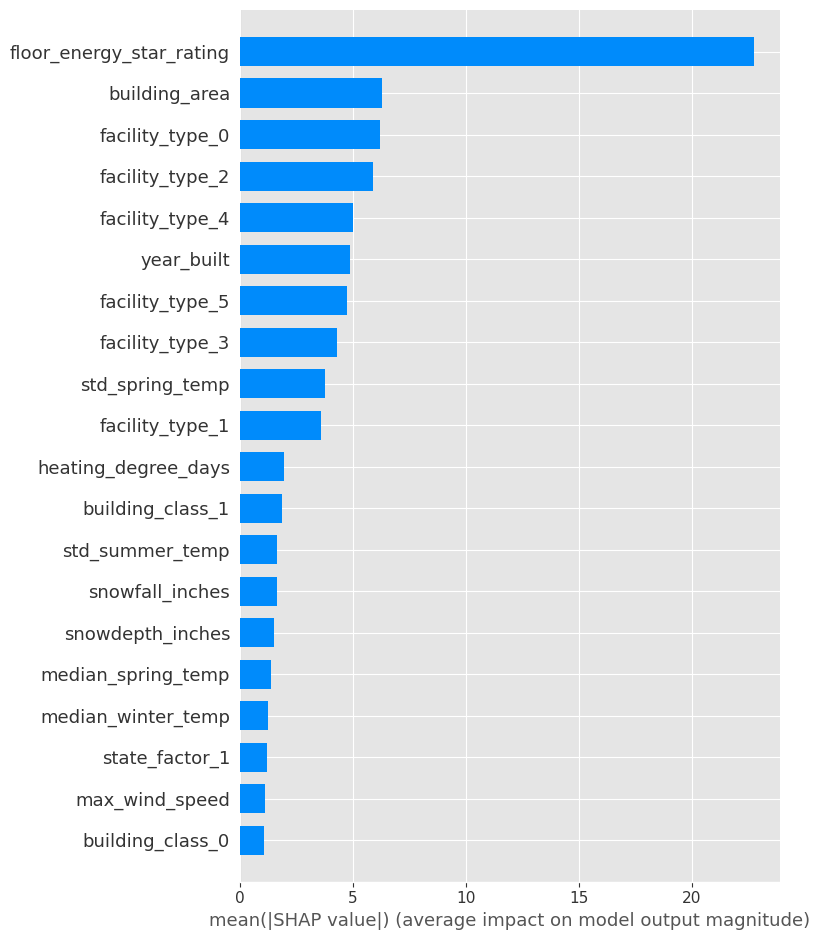

In [108]:
#It provide feature importance
shap.summary_plot(shap_value, sample_set,plot_type='bar')

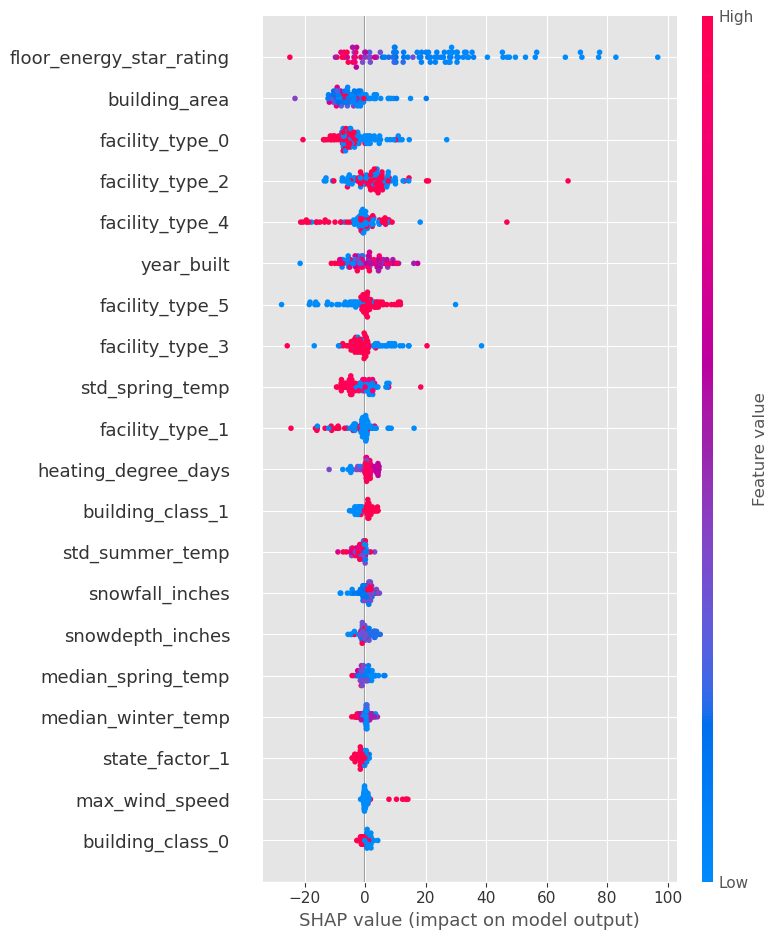

In [107]:
#It provide feature importance
shap.summary_plot(shap_value, sample_set)